### Read Single Cell Data

In [1]:
import anndata

In [2]:
path = '/Mounts/rbg-storage1/users/johnyang/cellot/datasets/scrna-sciplex3/hvg.h5ad'

In [3]:
data = anndata.read(path)

In [4]:
data

AnnData object with n_obs × n_vars = 762039 × 1000
    obs: 'size_factor', 'cell_type', 'replicate', 'dose', 'drug_code', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'drug', 'drug-dose', 'drug_code-dose', 'n_genes'
    var: 'gene_short_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs', 'marker_genes-drug-rank', 'marker_genes-drug-score'

In [5]:
data.obs.drug.value_counts()

control              17565
ellagic_acid          6255
divalproex_sodium     6198
ruxolitinib           6139
mc1568                6120
                     ...  
alvespimycin_hcl      2085
patupilone            1798
flavopiridol_hcl      1703
epothilone_a          1401
ym155                  989
Name: drug, Length: 189, dtype: int64

In [6]:
from cellot.data.cell import read_single_anndata
def load_markers(config, n_genes=50, gene_pool=None):
    data = read_single_anndata(config, path=None)
    key = f'marker_genes-{config.data.condition}-rank'

    # rebuttal preprocessing stored marker genes using
    # a generic marker_genes-condition-rank key
    # instead of e.g. marker_genes-drug-rank
    # let's just patch that here:
    if key not in data.varm:
        key = 'marker_genes-condition-rank'
        print('WARNING: using generic condition marker genes')
        
    # Filter marker genes using gene_pool before sorting and selecting top genes
    if gene_pool is not None:
        # Make sure gene_pool is a set for the intersection operation
        gene_pool = set(gene_pool)
        potential_mgs = set(data.varm[key].index)
        valid_genes = potential_mgs.intersection(gene_pool)
    else:
        valid_genes = data.varm[key].index

    sel_mg = (
        data.varm[key].loc[valid_genes][config.data.target]
        .sort_values()
        .index
    )[:n_genes]
    
    marker_gene_indices = [i for i, gene in enumerate(data.var_names) if gene in sel_mg]
    marker_gene_names = [gene for gene in data.var_names if gene in sel_mg]

    return sel_mg, marker_gene_indices, marker_gene_names

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import hydra
with hydra.initialize('../configs/diff/'):
    cfg = hydra.compose(config_name='eval.yaml')

<ipython-input-7-41c4b35bc83f>:2: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize('../configs/diff/'):
/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'eval.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [8]:
cfg.TARGET = 'trametinib'

In [66]:
import pandas as pd
sorted_spearman_df = pd.read_csv('/Mounts/rbg-storage1/users/johnyang/cellot/notebooks/sorted_spearman.csv')
sorted_spearman_df.head()
sorted_genes_ae = sorted_spearman_df['id']
good_ae_genes = set(sorted_genes_ae[:300])

In [68]:
gae_sel_mg, gae_marker_gene_indices, gae_marker_gene_names = load_markers(cfg, n_genes=50, gene_pool=good_ae_genes)

2023-07-17 16:46:47,732 Loaded cell data with TARGET trametinib and OBS SHAPE (20842, 16)


In [70]:
gae_sel_mg

Index(['ENSG00000198074.9', 'ENSG00000019186.9', 'ENSG00000108846.15',
       'ENSG00000115414.18', 'ENSG00000112541.13', 'ENSG00000117983.17',
       'ENSG00000145819.15', 'ENSG00000184588.17', 'ENSG00000165376.10',
       'ENSG00000154529.14', 'ENSG00000182752.9', 'ENSG00000251003.7',
       'ENSG00000101144.12', 'ENSG00000117724.12', 'ENSG00000157168.18',
       'ENSG00000275395.5', 'ENSG00000185483.11', 'ENSG00000108405.3',
       'ENSG00000215182.8', 'ENSG00000004948.13', 'ENSG00000227706.3',
       'ENSG00000065809.13', 'ENSG00000144847.12', 'ENSG00000107957.16',
       'ENSG00000108602.17', 'ENSG00000059804.15', 'ENSG00000047648.21',
       'ENSG00000003436.15', 'ENSG00000229140.8', 'ENSG00000066279.17',
       'ENSG00000153956.15', 'ENSG00000086548.8', 'ENSG00000171408.13',
       'ENSG00000005108.15', 'ENSG00000138696.10', 'ENSG00000064042.17',
       'ENSG00000180287.16', 'ENSG00000204740.10', 'ENSG00000023171.16',
       'ENSG00000153976.2', 'ENSG00000167281.18', 'ENSG000001

In [69]:
sel_mg, marker_gene_indices, marker_gene_names = load_markers(cfg, n_genes=50)

2023-07-17 16:47:12,275 Loaded cell data with TARGET trametinib and OBS SHAPE (20842, 16)


In [ ]:
sel_mg, marker_gene_indices, marker_gene_name

In [11]:
data

AnnData object with n_obs × n_vars = 762039 × 1000
    obs: 'size_factor', 'cell_type', 'replicate', 'dose', 'drug_code', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'drug', 'drug-dose', 'drug_code-dose', 'n_genes'
    var: 'gene_short_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs', 'marker_genes-drug-rank', 'marker_genes-drug-score'

In [ ]:
control = data[data.obs.drug == 'control']
control

View of AnnData object with n_obs × n_vars = 17565 × 1000
    obs: 'size_factor', 'cell_type', 'replicate', 'dose', 'drug_code', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'drug', 'drug-dose', 'drug_code-dose', 'n_genes'
    var: 'gene_short_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs', 'marker_genes-drug-rank', 'marker_genes-drug-score'

In [ ]:
trametinib = data[data.obs.drug == 'trametinib']

In [14]:
data[:, 'ENSG00000160963.13'].X

<762039x1 sparse matrix of type '<class 'numpy.float32'>'
	with 29574 stored elements in Compressed Sparse Row format>

In [15]:
control[:, 'ENSG00000160963.13'].X

<17565x1 sparse matrix of type '<class 'numpy.float32'>'
	with 353 stored elements in Compressed Sparse Row format>

In [27]:
trametinib[:, 'ENSG00000160963.13'].X

<3277x1 sparse matrix of type '<class 'numpy.float32'>'
	with 47 stored elements in Compressed Sparse Row format>

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_gene_expression(data, gene, condition, ae=False, cutoff=0.1):
    # Retrieve the data for the specific gene
    gene_expression = data[:, gene].X

    # If your data is stored as a sparse matrix, you need to convert it to a dense one
    if isinstance(gene_expression, np.ndarray) == False:
        gene_expression = gene_expression.toarray()

    # Flatten the array if necessary (for example, if it's a 2D numpy array with one column)
    gene_expression = gene_expression.flatten()

    # Exclude zeroes
    if not ae:
        gene_expression_nonzero = gene_expression[gene_expression != 0]
    else:
        gene_expression_nonzero = gene_expression[gene_expression > cutoff]

    # Plot the distribution using Seaborn
    plt.figure(figsize=(10, 6))
    plot = sns.histplot(gene_expression_nonzero, kde=True, bins=30)
    plt.title(f'Distribution of {gene} Expression in {condition} (excluding zeroes)')
    plt.xlabel('Expression Level')

    # Get total number of cells (including zeros)
    total_cells = len(gene_expression)
    
    # Adjust y-tick labels to reflect proportions instead of raw counts
    plt.yticks(ticks=plot.get_yticks(), labels=plot.get_yticks()/total_cells)

    plt.ylabel('Proportion')
    plt.show()


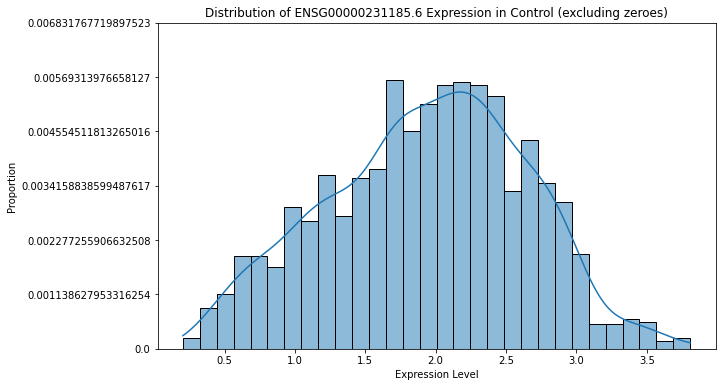

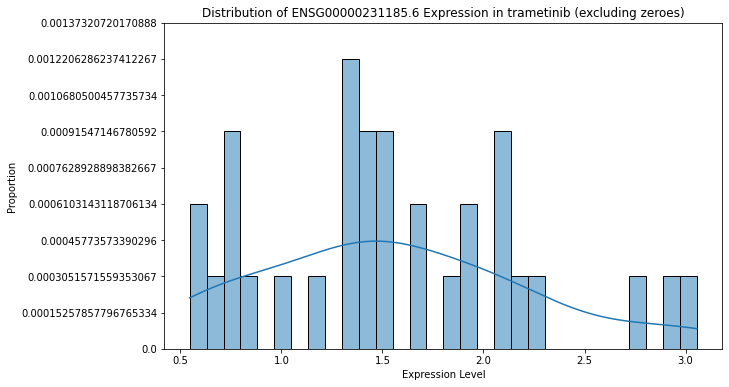

In [42]:
plot_gene_expression(control, 'ENSG00000231185.6', 'Control')
plot_gene_expression(trametinib, 'ENSG00000231185.6', 'trametinib')


In [43]:
from cellot.data.utils import load_ae_cell_data, load_ae, cast_dataset_to_loader

ae_path = '/Mounts/rbg-storage1/users/johnyang/cellot/saved_weights/ae/ae.pt'
autoencoder = load_ae(cfg, device='cpu', restore=ae_path, input_dim=1000)

Loading ae from checkpoint


In [44]:
autoencoder

AutoEncoder(
  (encoder_net): Sequential(
    (0): Linear(in_features=1000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=50, bias=True)
  )
  (decoder_net): Sequential(
    (0): Linear(in_features=50, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1000, bias=True)
  )
  (mse): MSELoss()
)

In [48]:
import torch
from scipy import sparse

inputs = torch.Tensor(
    data.X if not sparse.issparse(data.X) else data.X.todense()
)

In [49]:
genes = data.var_names.to_list()
emb_data = anndata.AnnData(
    autoencoder.eval().encode(inputs).detach().numpy(),
    obs=data.obs.copy(),
    uns=data.uns.copy(),
)
data.uns["genes"] = genes

In [62]:
recon_emb_data = anndata.AnnData(
    autoencoder.eval().decode(torch.tensor(emb_data.X)).detach().numpy(),
    obs=data.obs.copy(),
    uns=data.uns.copy(),
    var=data.var.copy(),
    varm=data.varm.copy(),
)
recon_emb_data.uns["genes"] = genes

In [63]:
recon_emb_data

AnnData object with n_obs × n_vars = 762039 × 1000
    obs: 'size_factor', 'cell_type', 'replicate', 'dose', 'drug_code', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'drug', 'drug-dose', 'drug_code-dose', 'n_genes'
    var: 'gene_short_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'rank_genes_groups', 'genes'
    varm: 'PCs', 'marker_genes-drug-rank', 'marker_genes-drug-score'

In [64]:
recon_control = recon_emb_data[recon_emb_data.obs.drug == 'control']
recon_trametinib = recon_emb_data[recon_emb_data.obs.drug == 'trametinib']

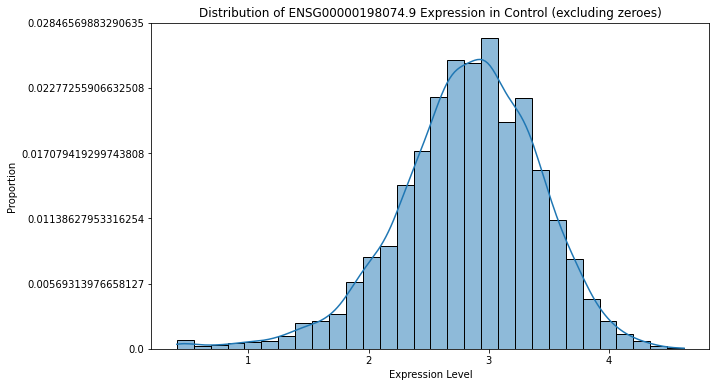

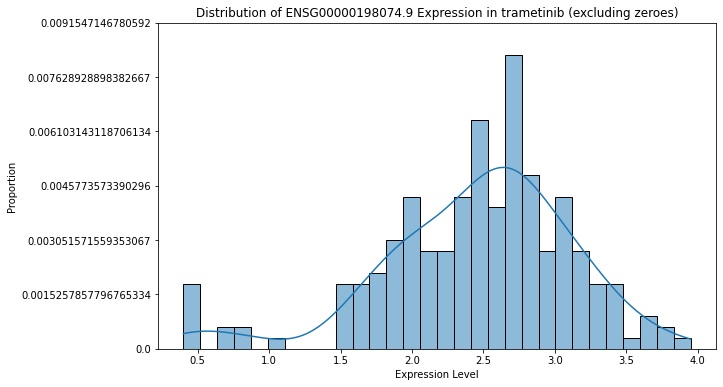

In [79]:
plot_gene_expression(recon_control, 'ENSG00000198074.9', 'Control', ae=True, cutoff=0.4)
plot_gene_expression(recon_trametinib, 'ENSG00000198074.9', 'trametinib', ae=True, cutoff=0.4)

In [45]:
load_ae_cell_data

<function cellot.data.utils.load_ae_cell_data(config, data=None, split_on=None, return_as='loader', include_model_kwargs=False, pair_batch_on=None, ae=None, encode_latents=False, sel_mg=None, **kwargs)>

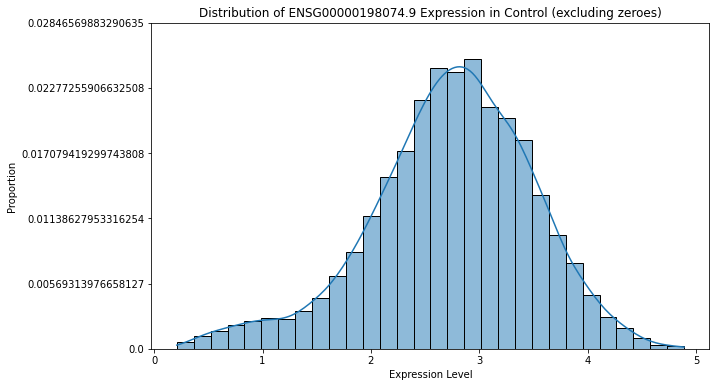

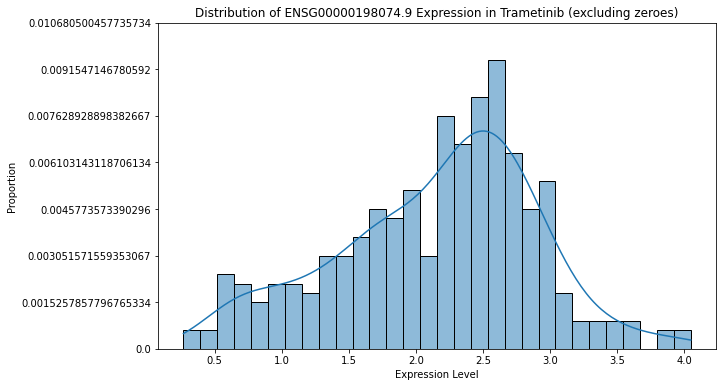

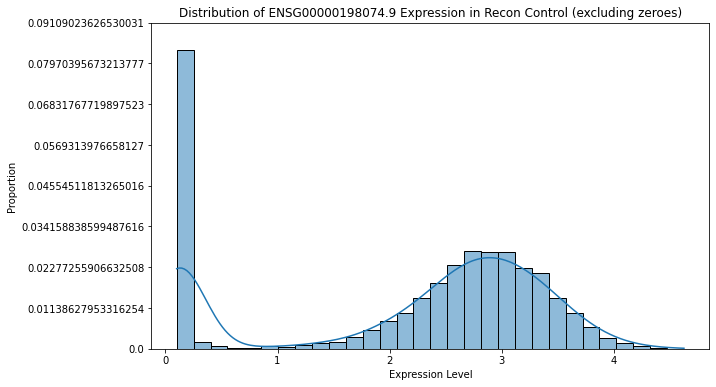

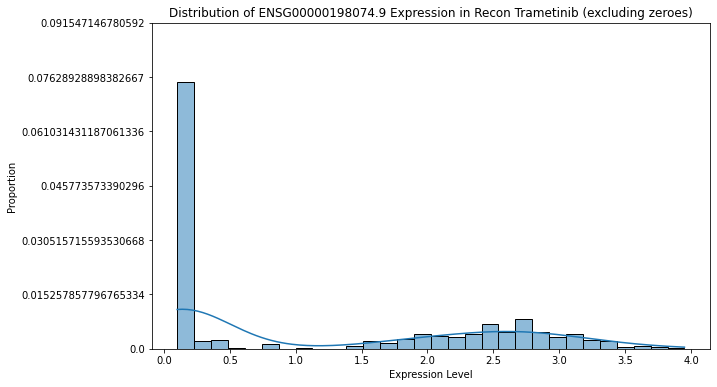

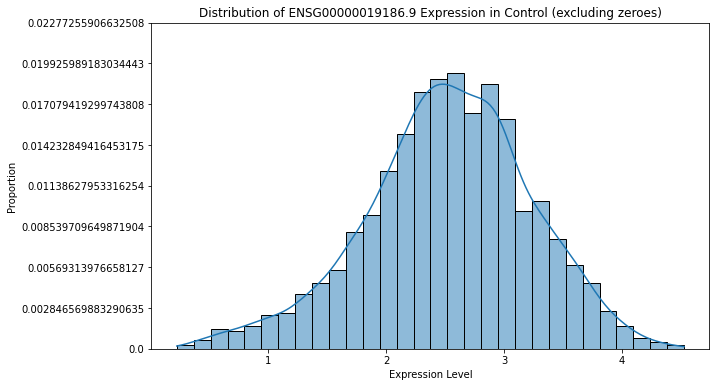

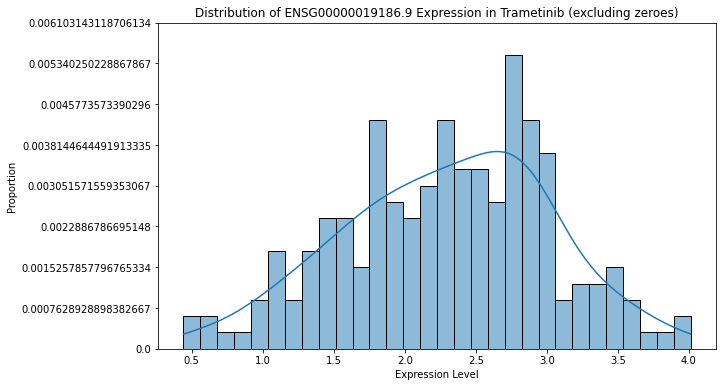

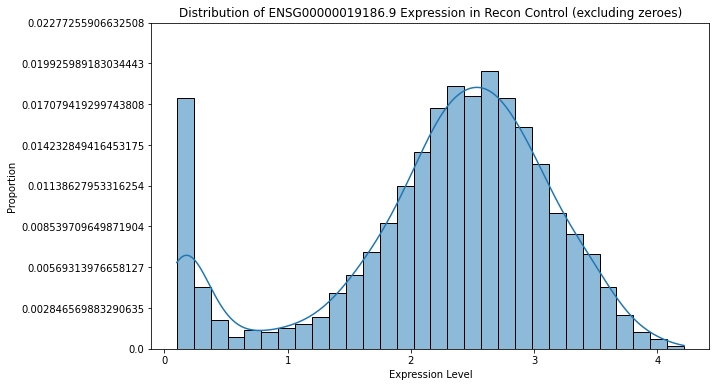

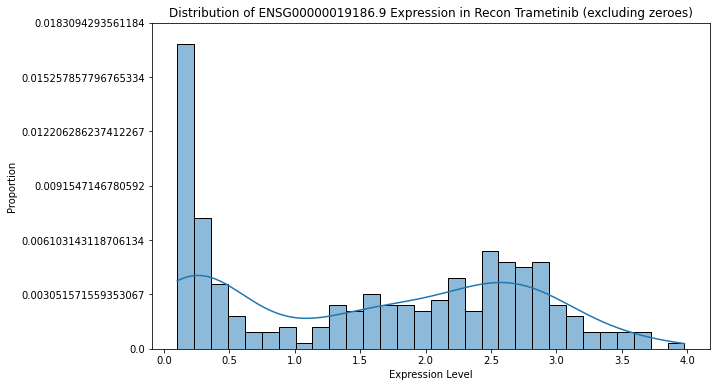

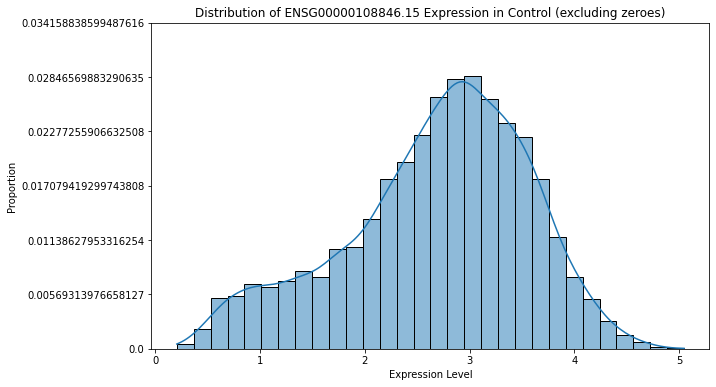

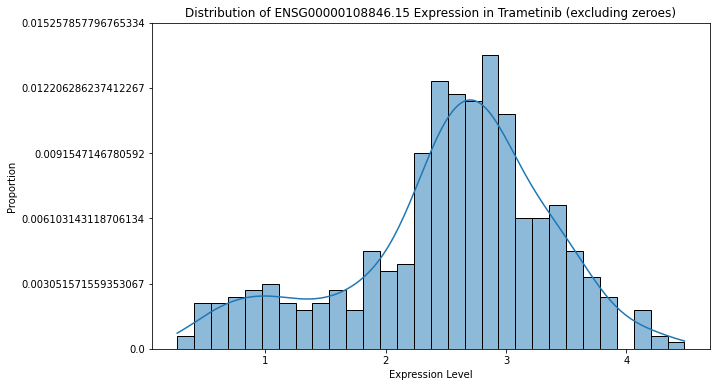

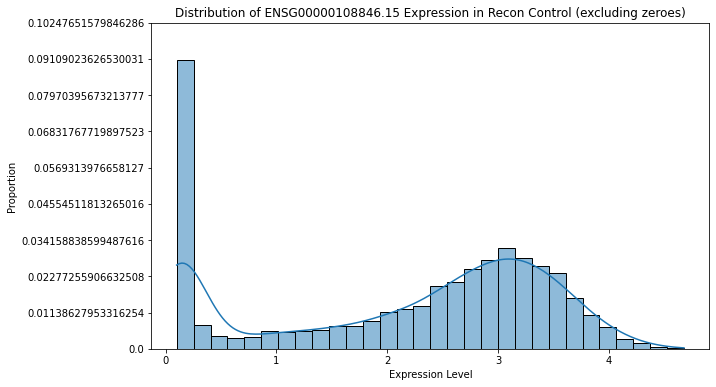

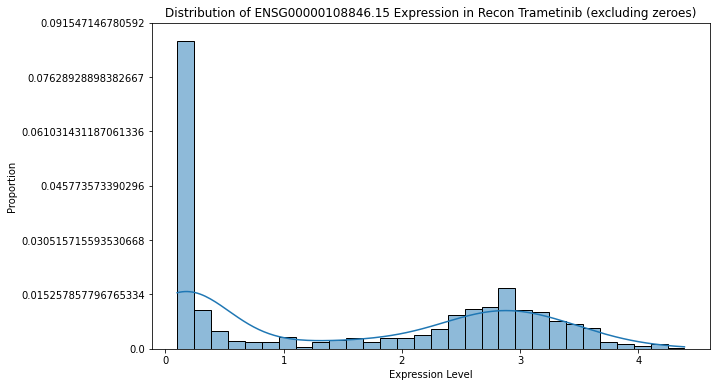

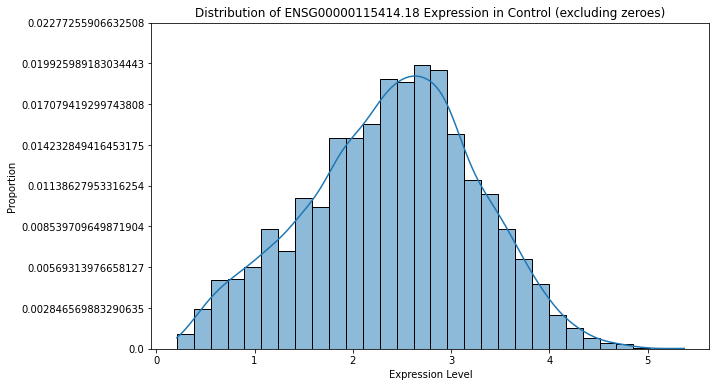

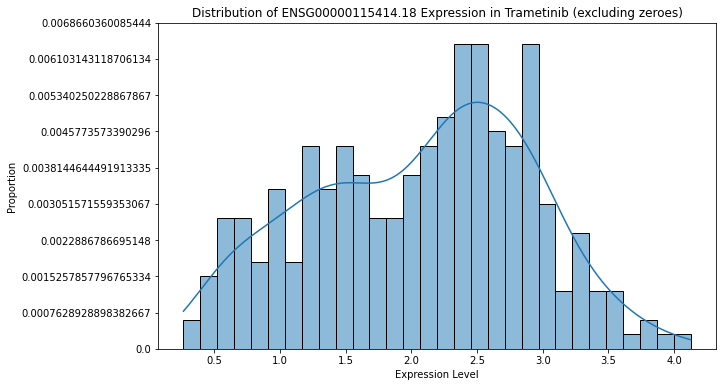

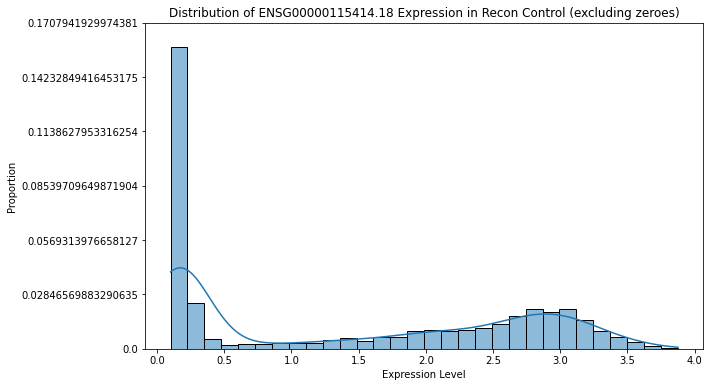

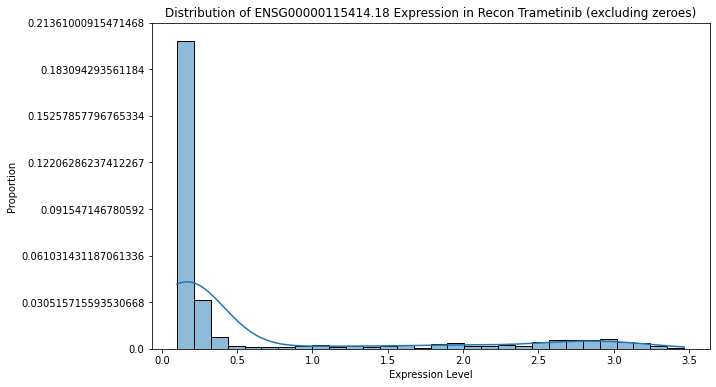

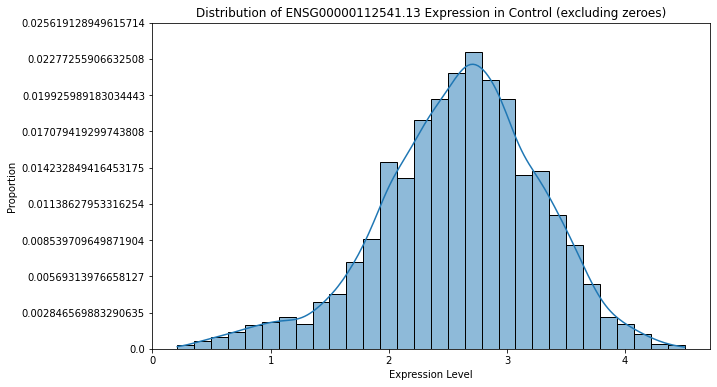

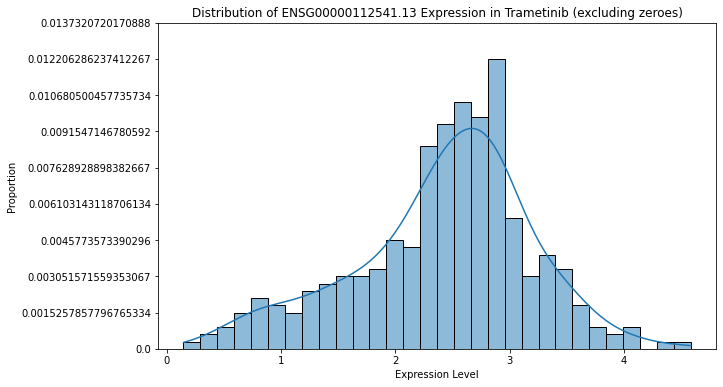

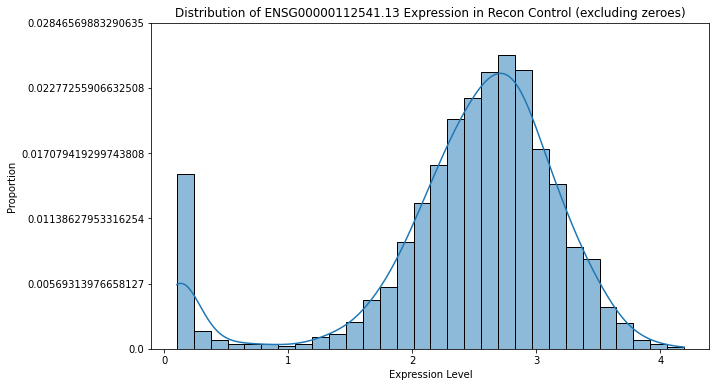

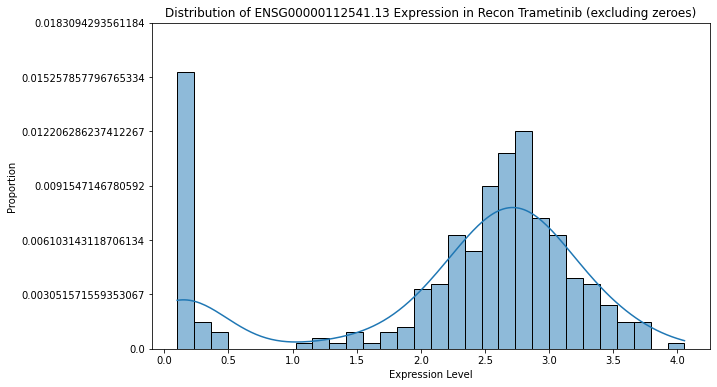

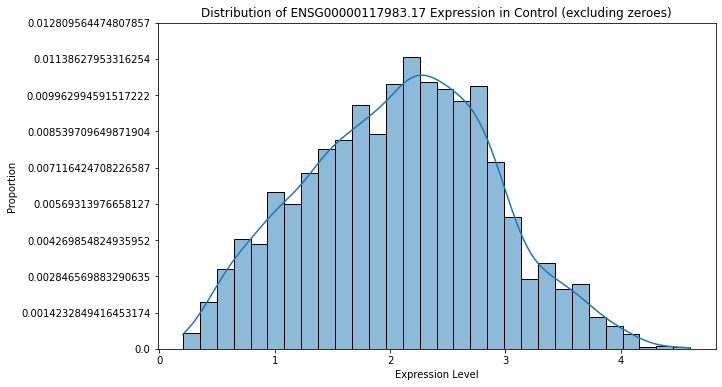

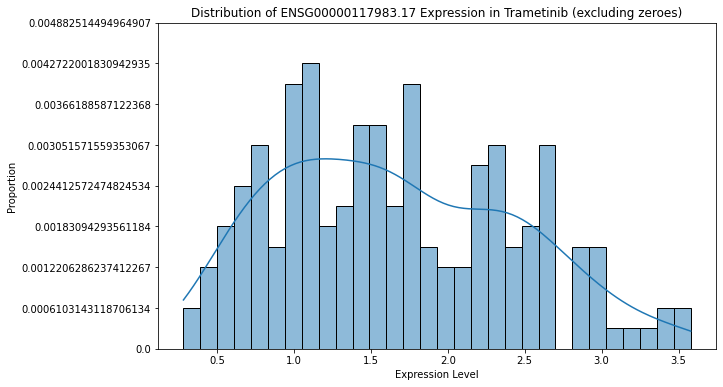

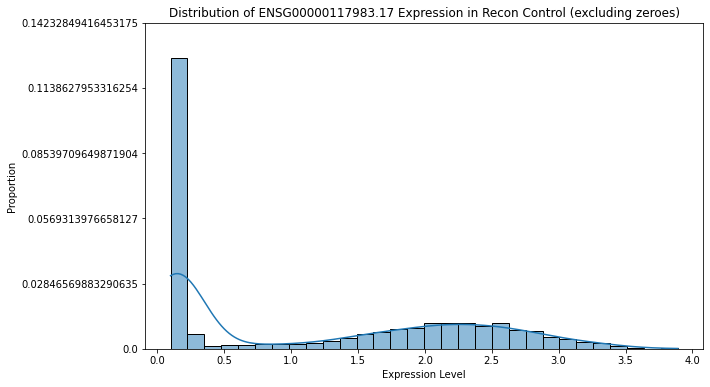

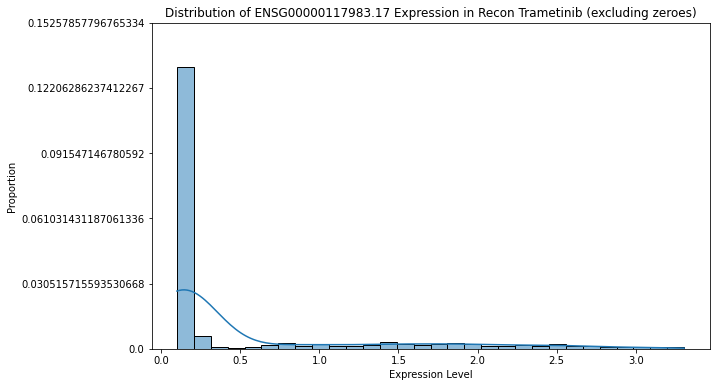

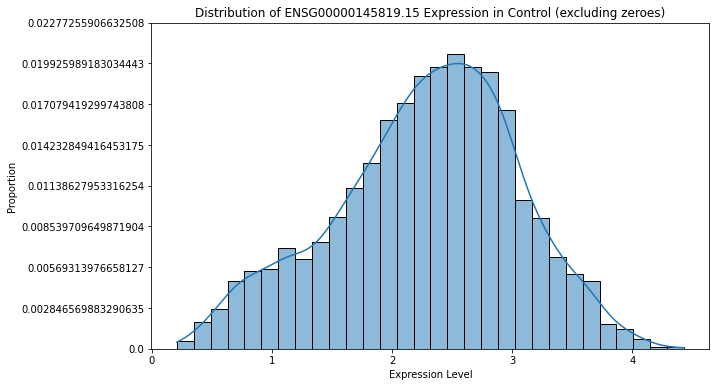

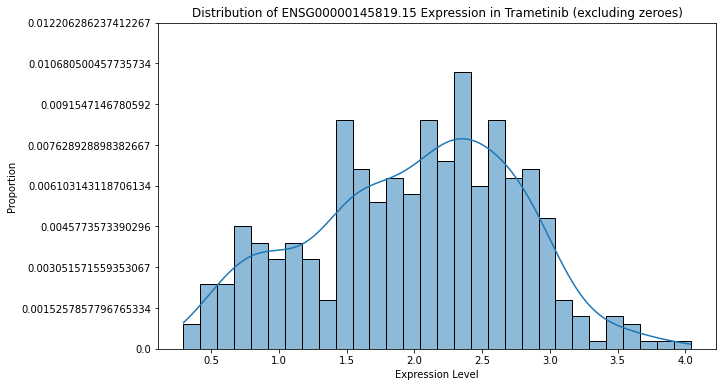

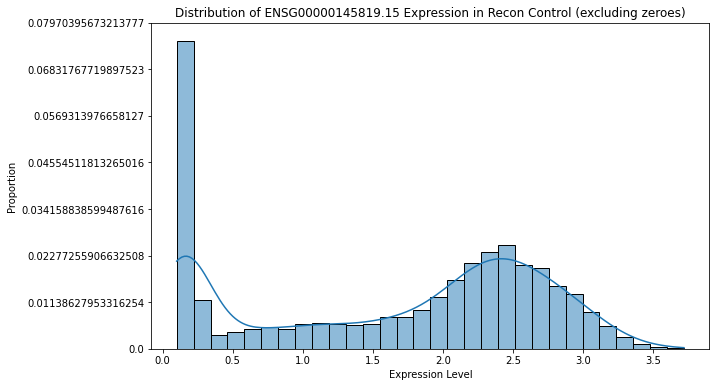

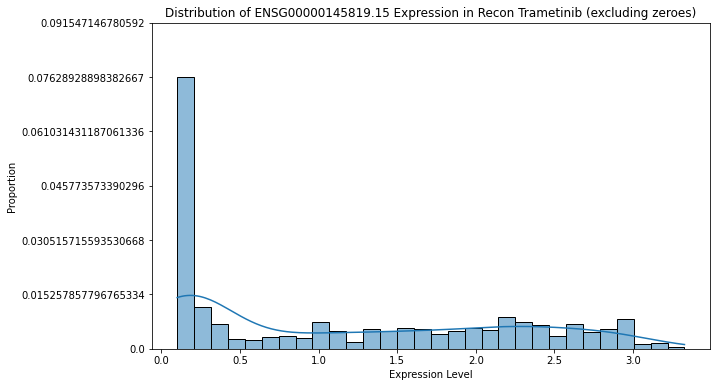

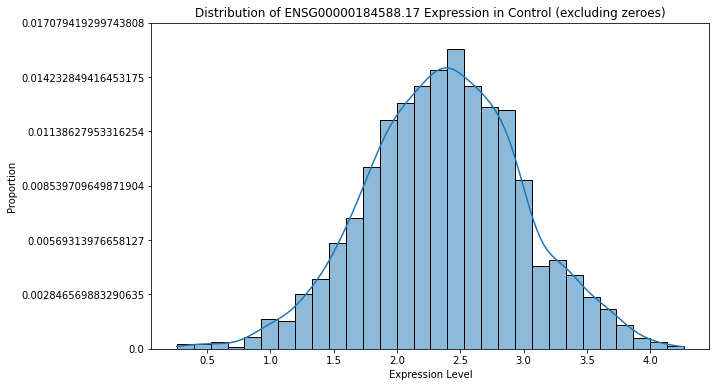

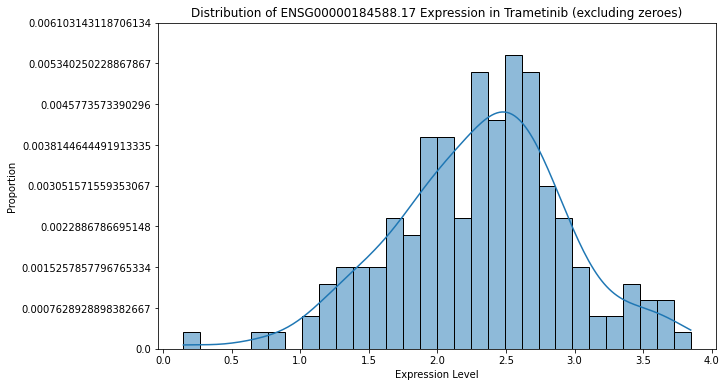

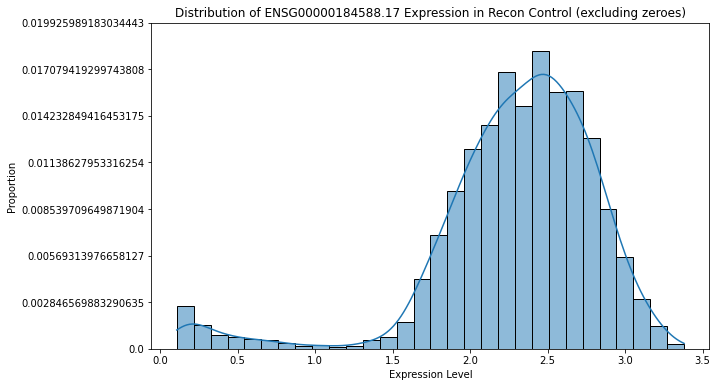

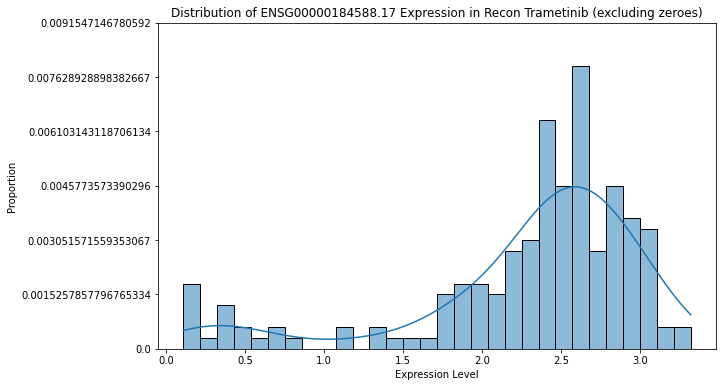

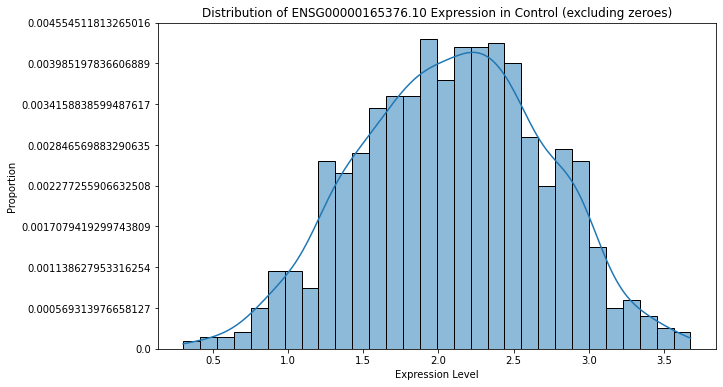

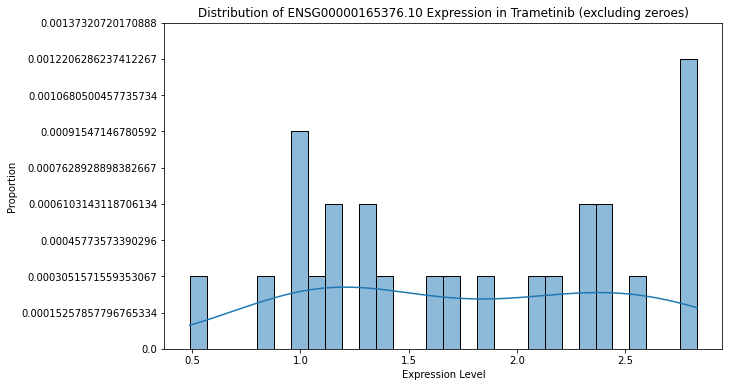

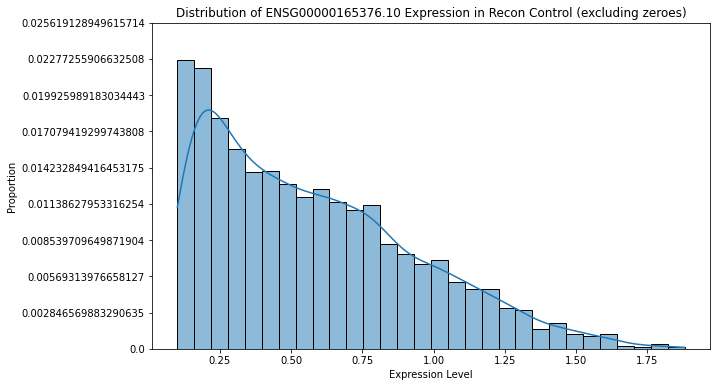

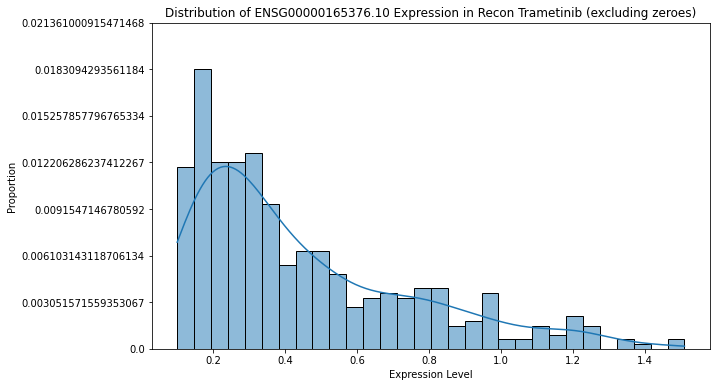

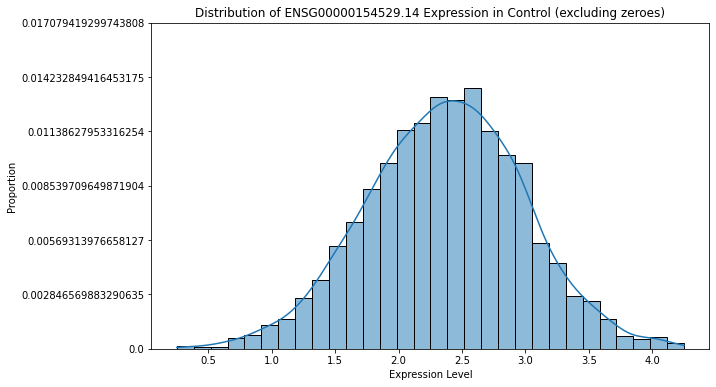

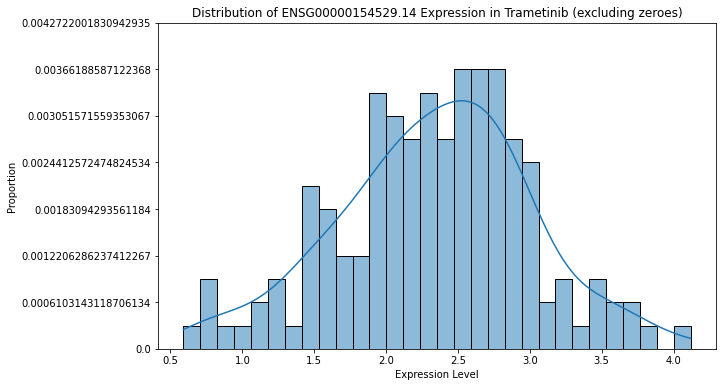

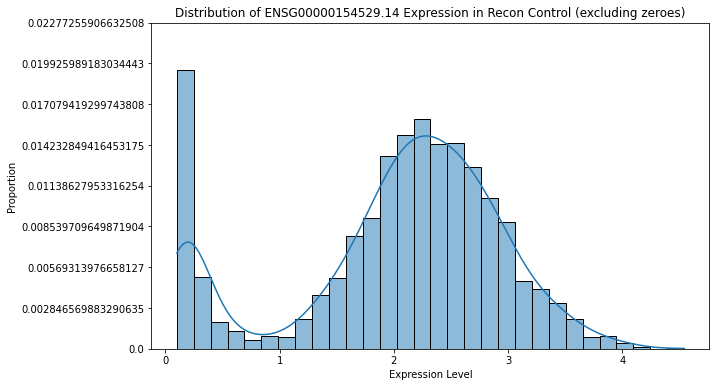

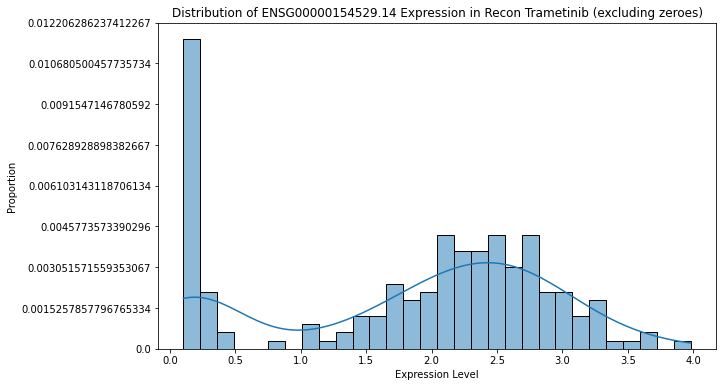

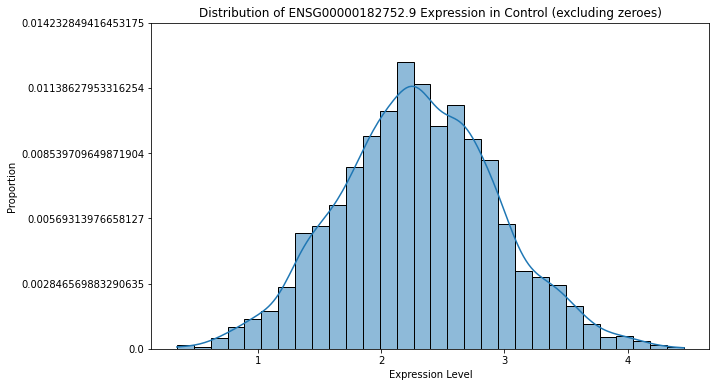

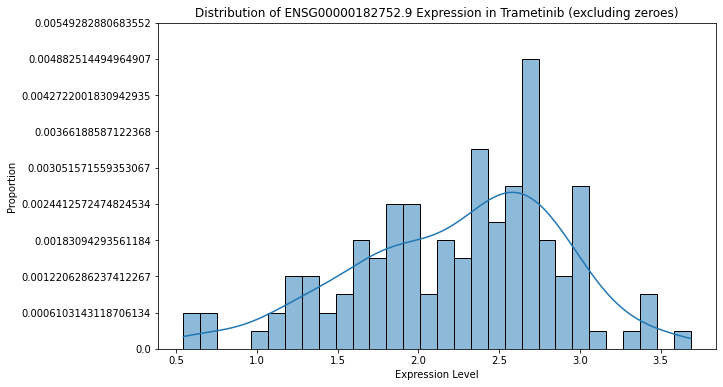

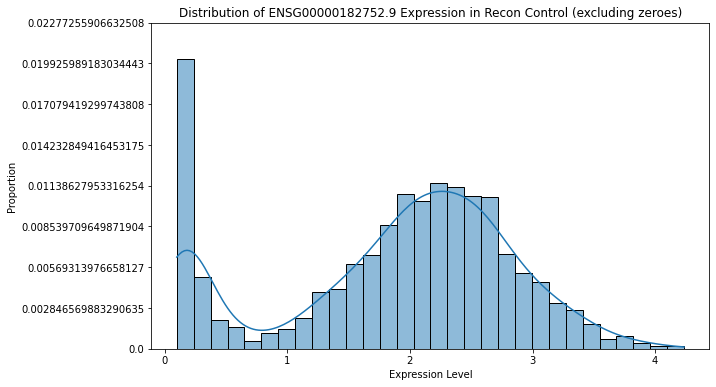

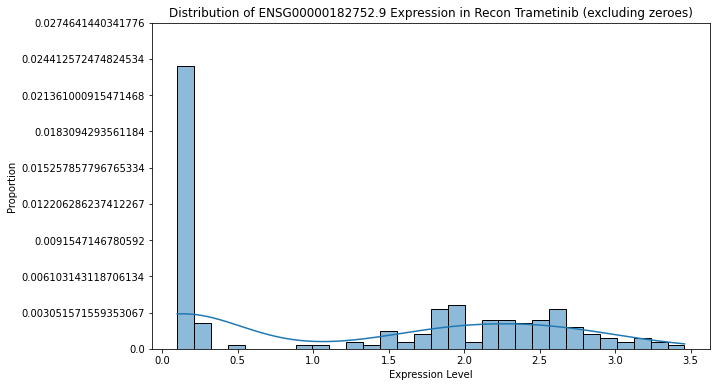

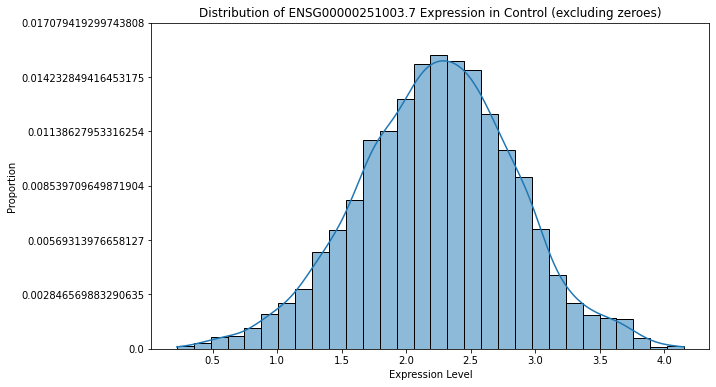

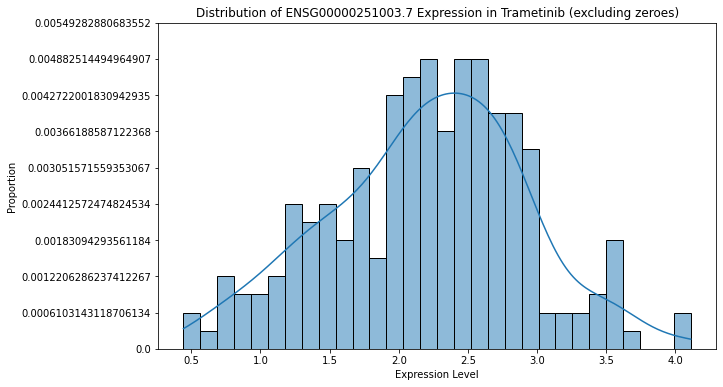

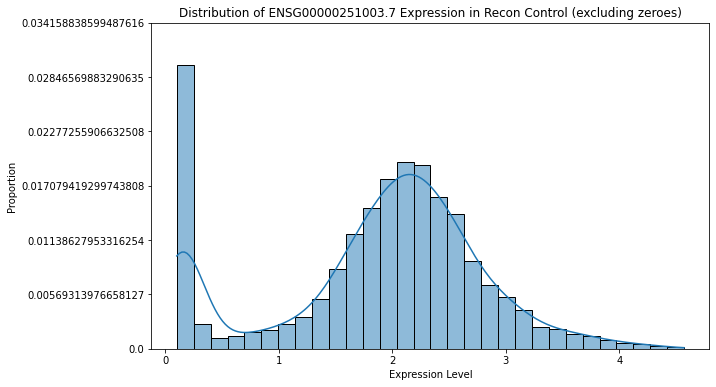

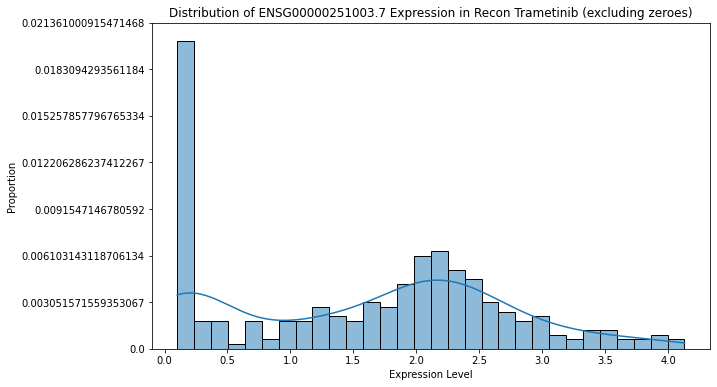

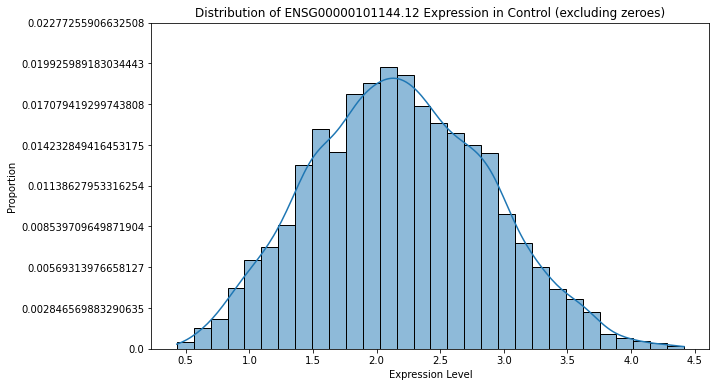

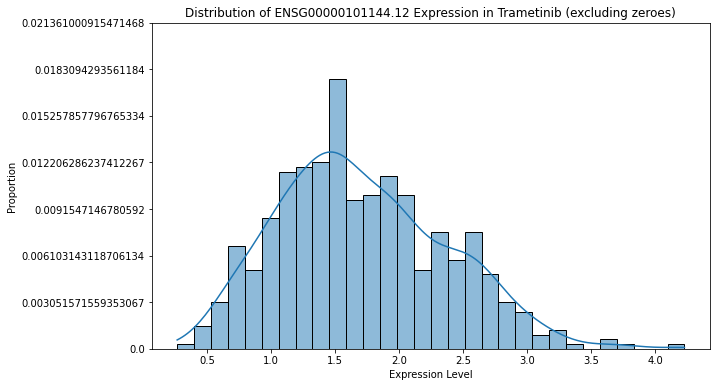

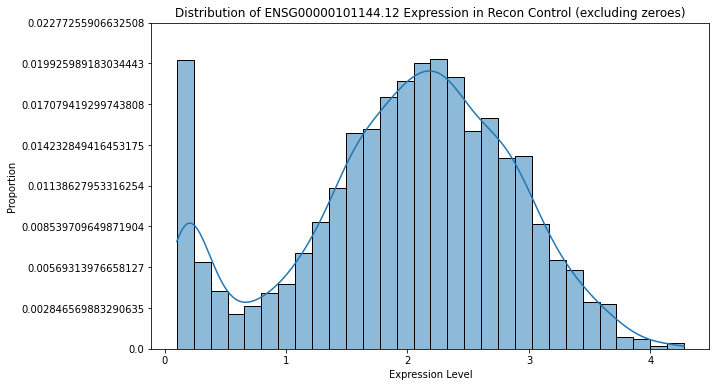

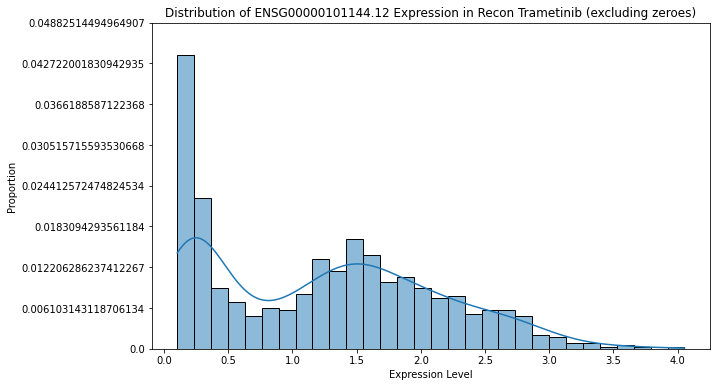

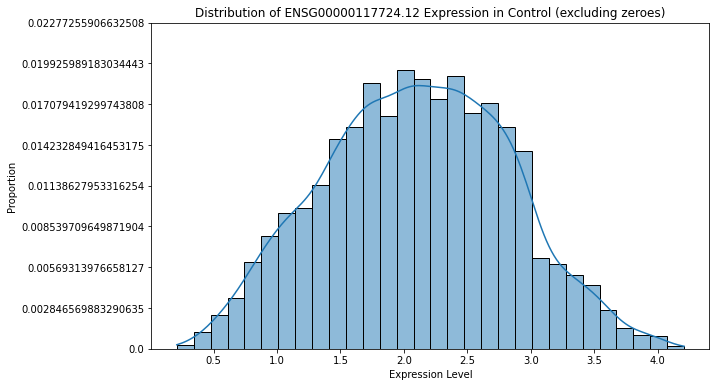

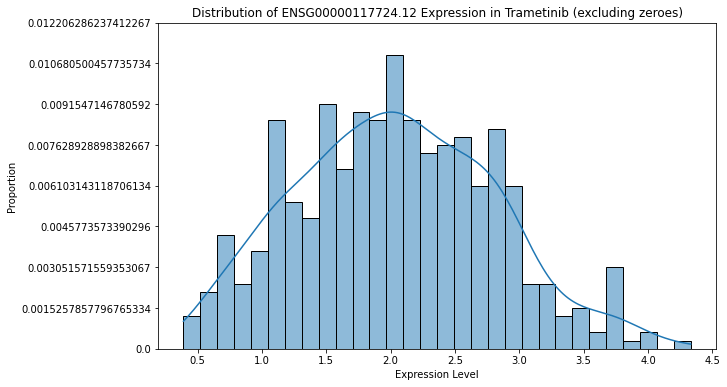

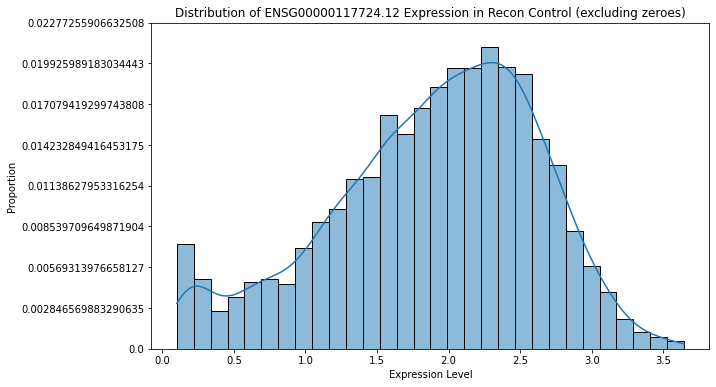

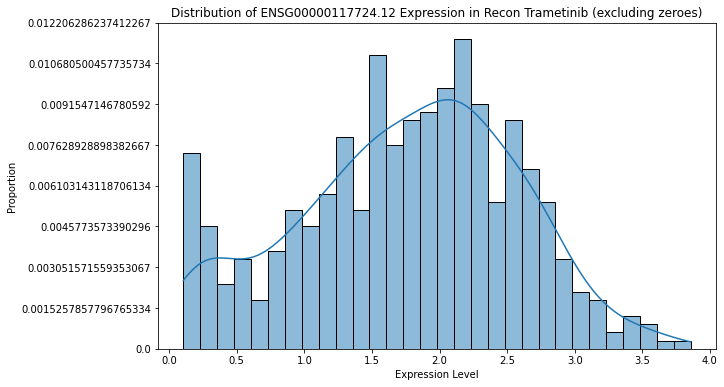

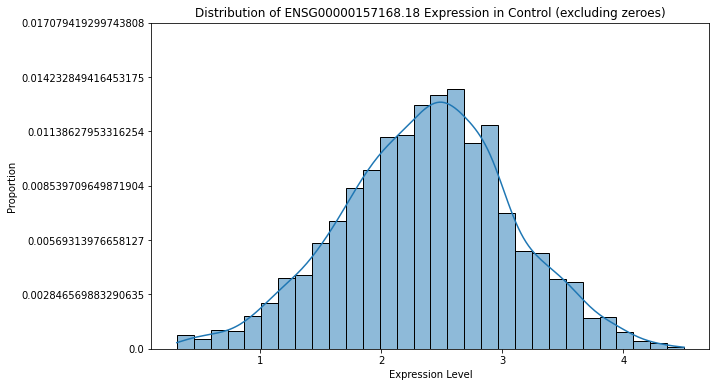

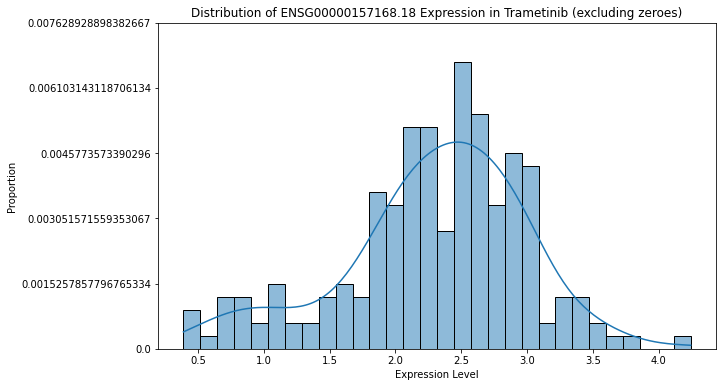

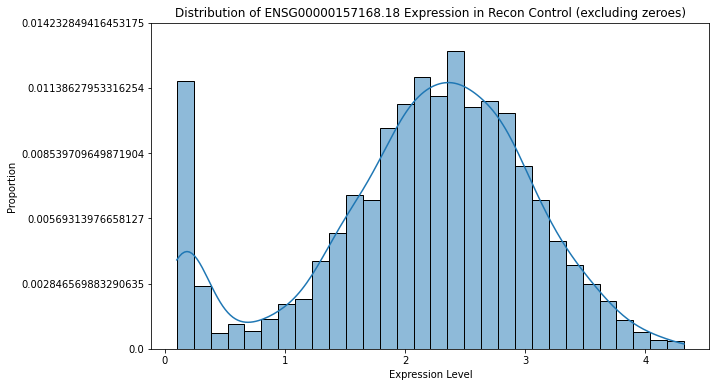

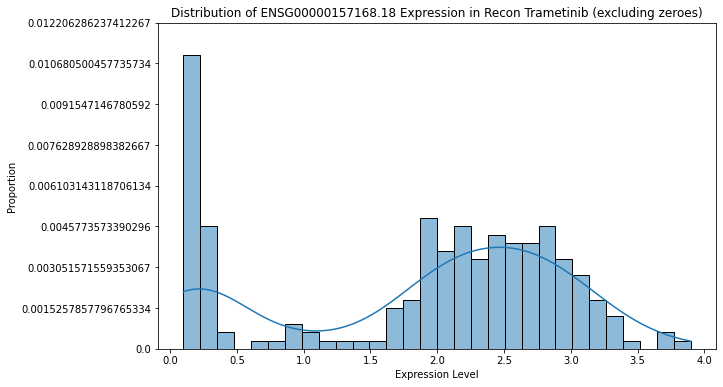

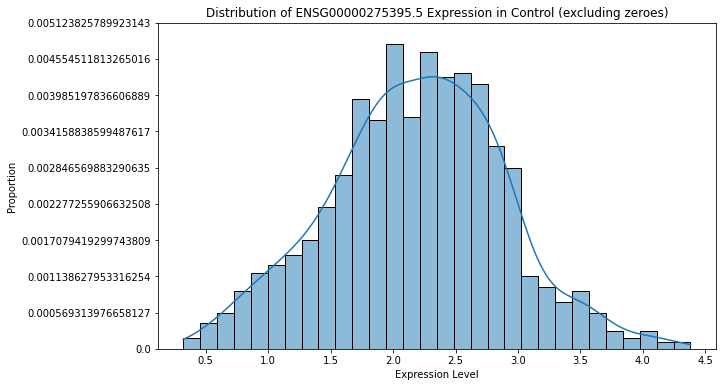

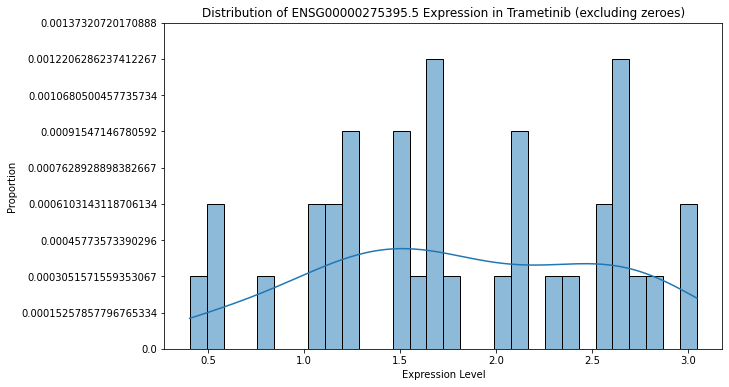

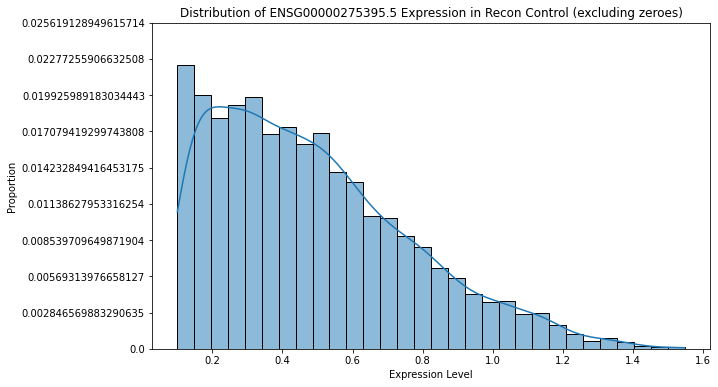

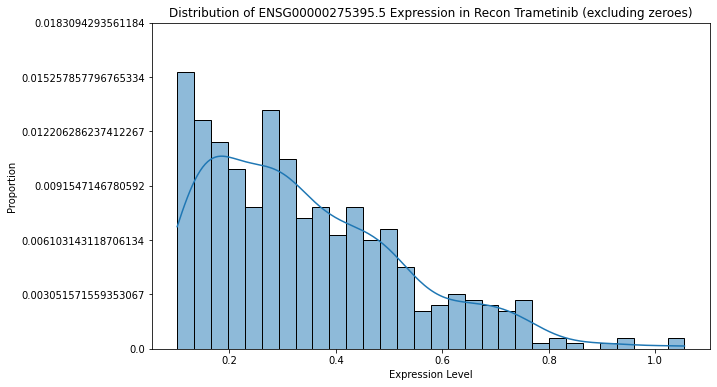

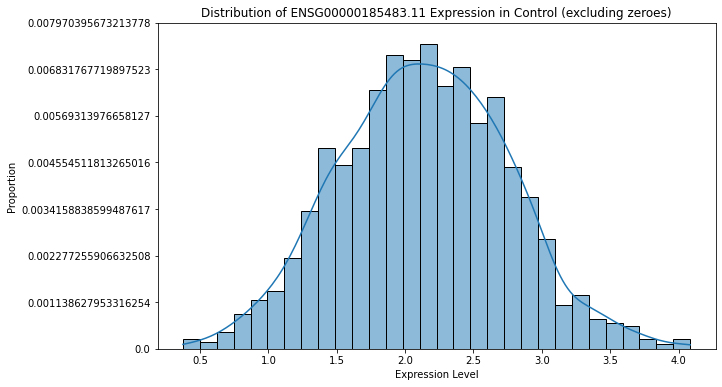

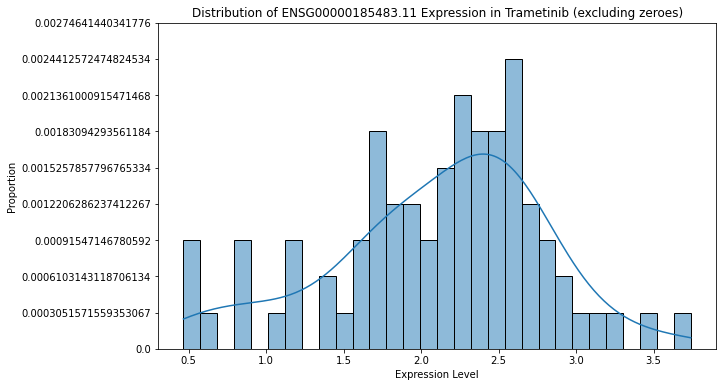

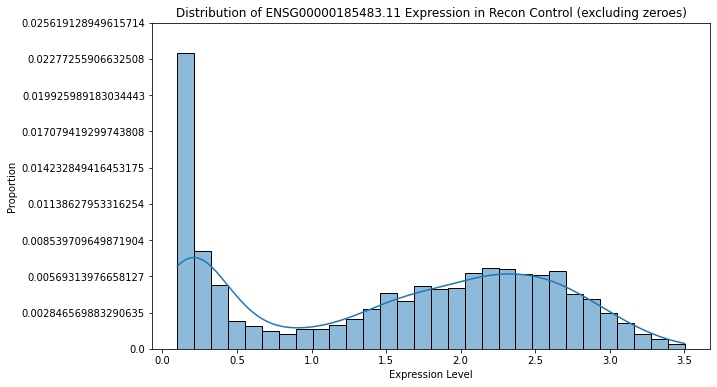

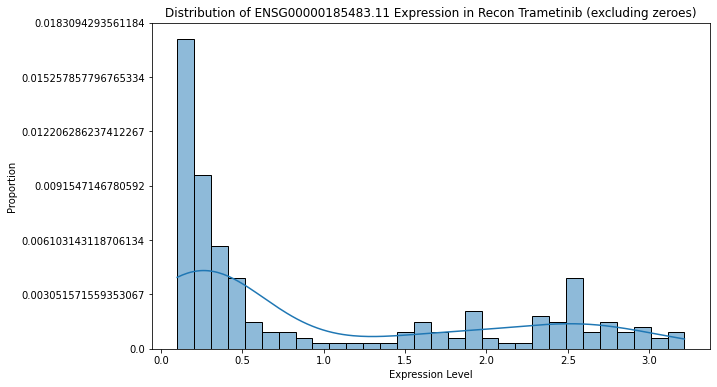

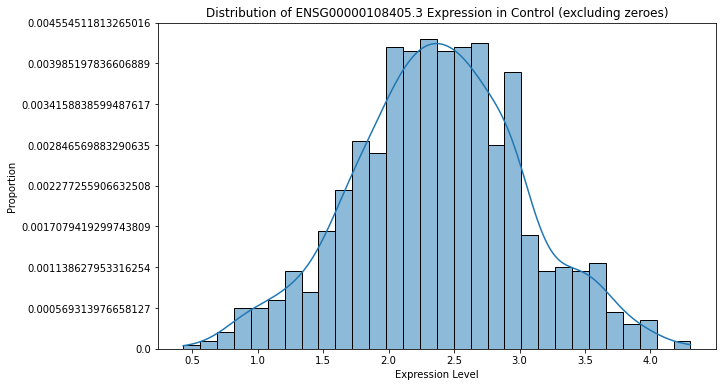

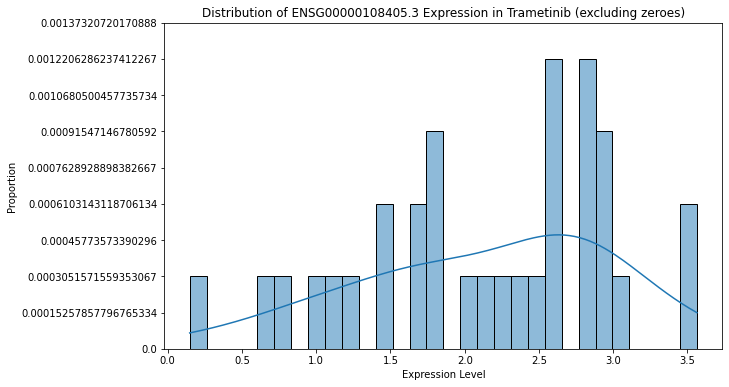

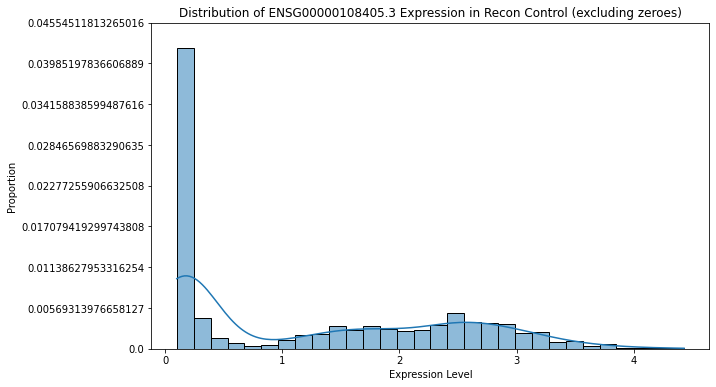

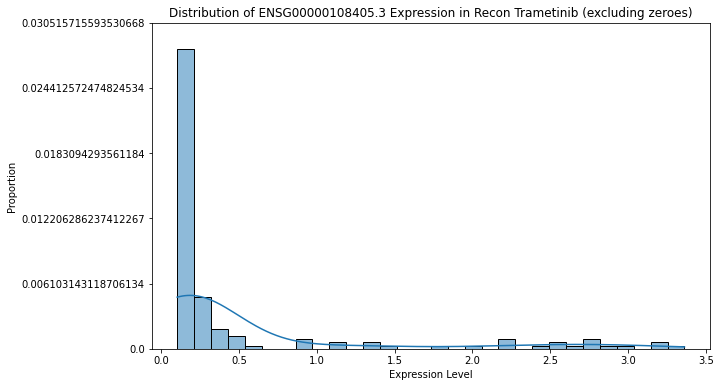

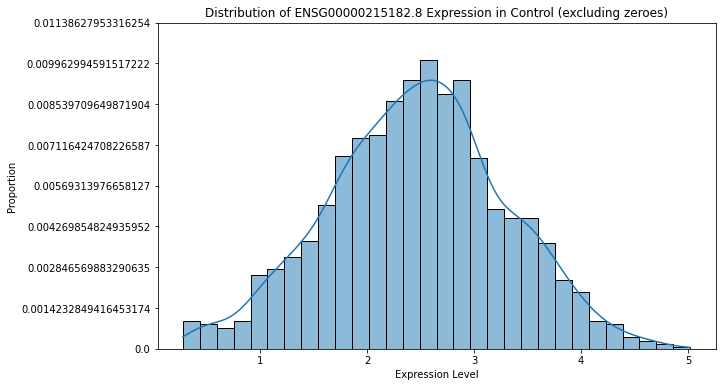

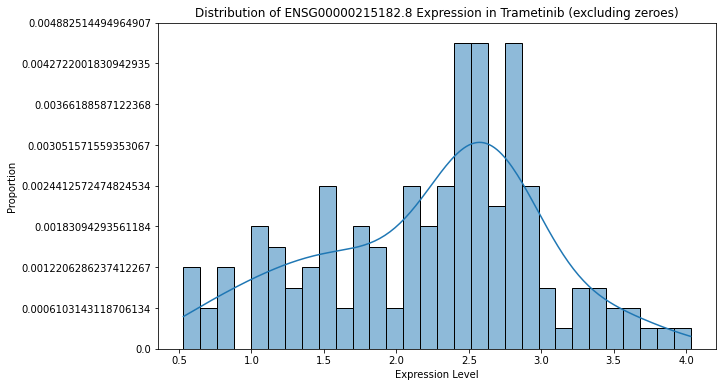

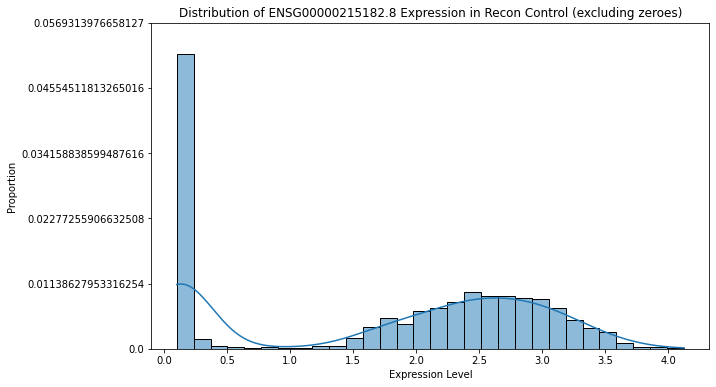

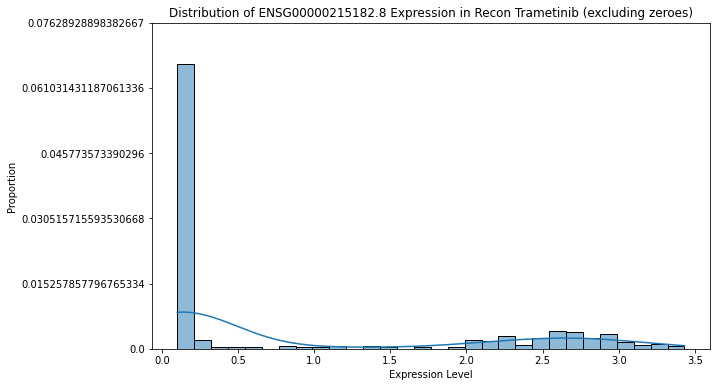

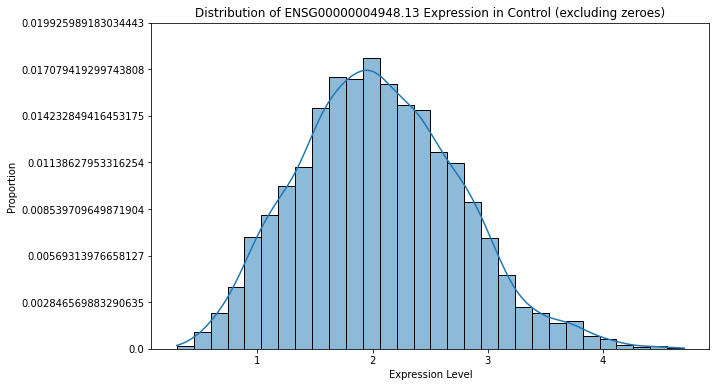

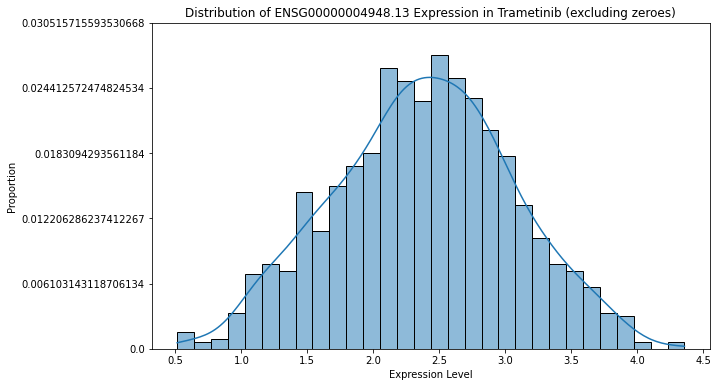

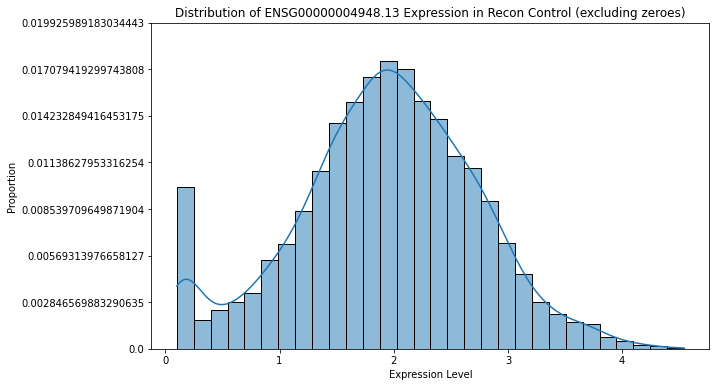

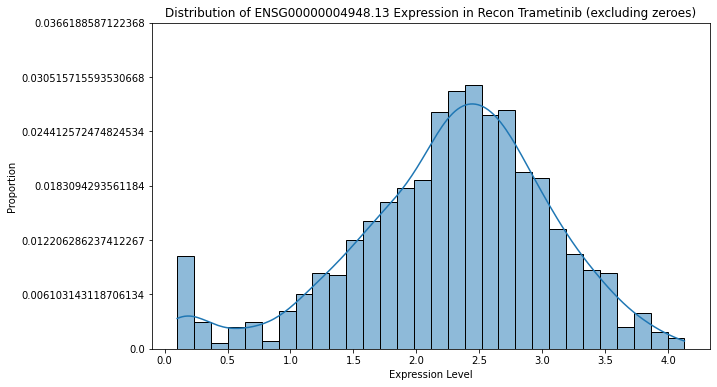

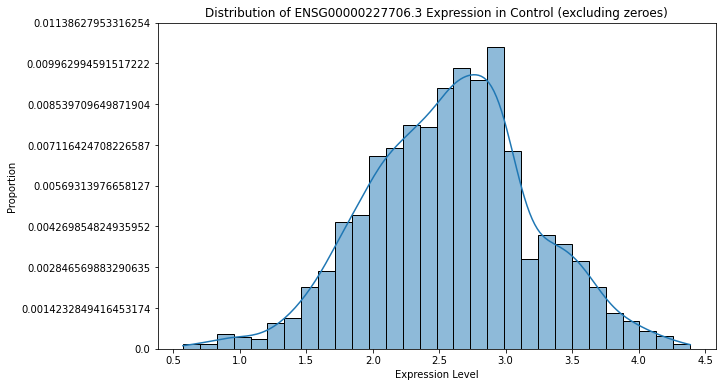

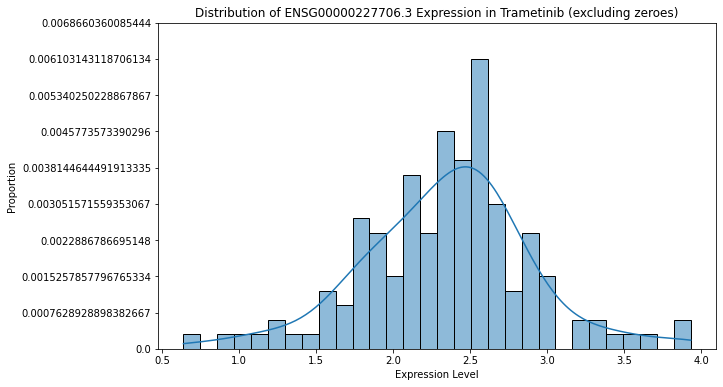

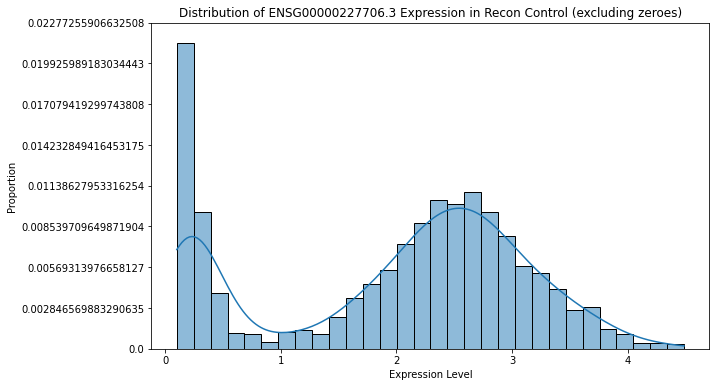

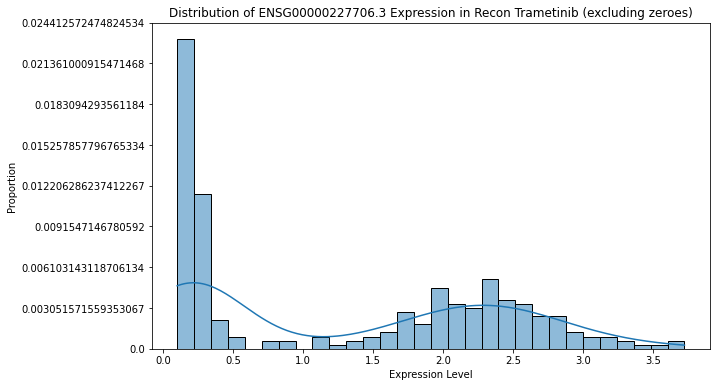

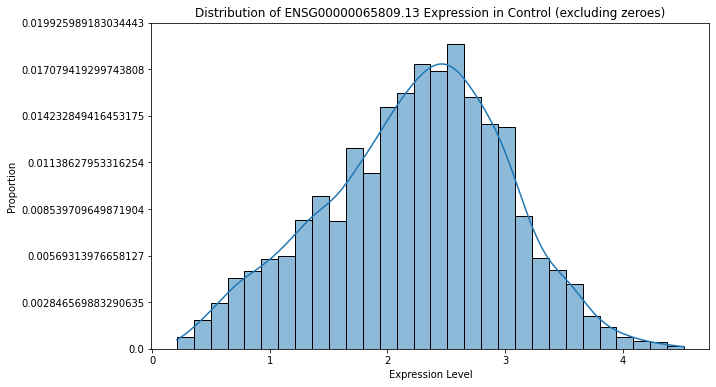

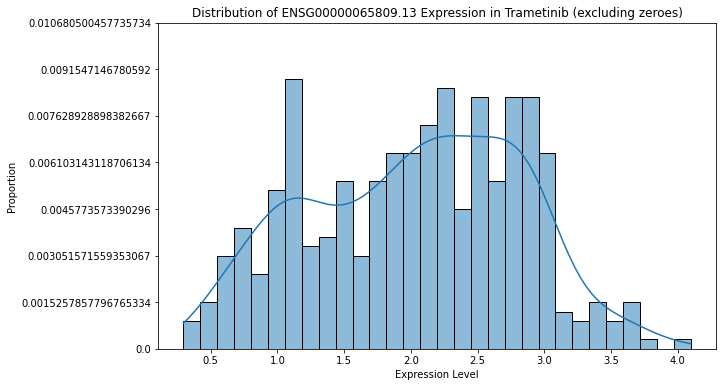

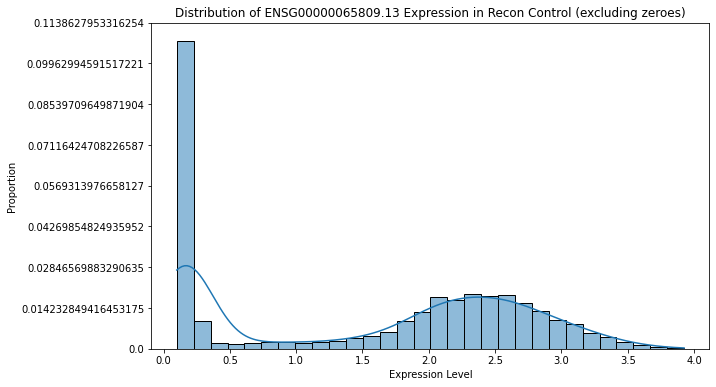

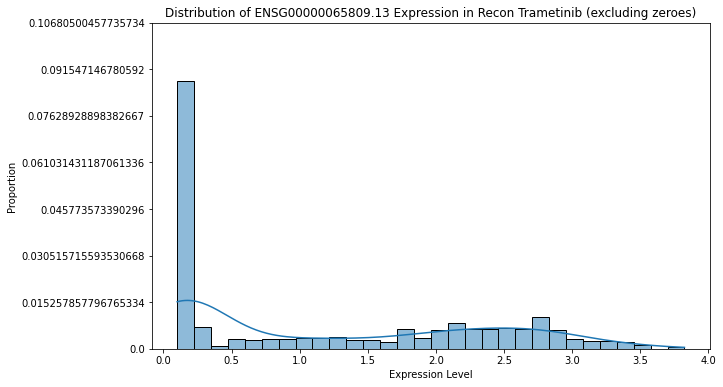

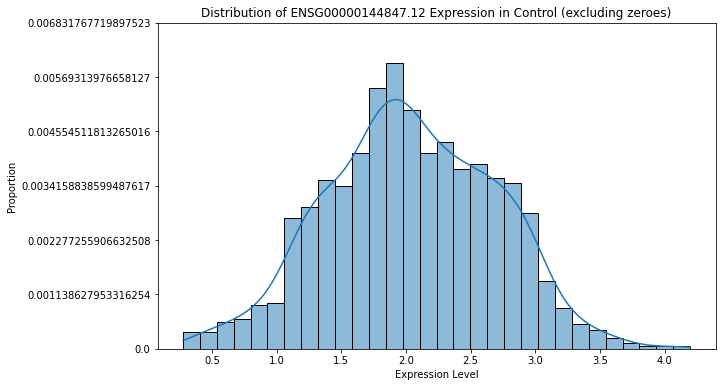

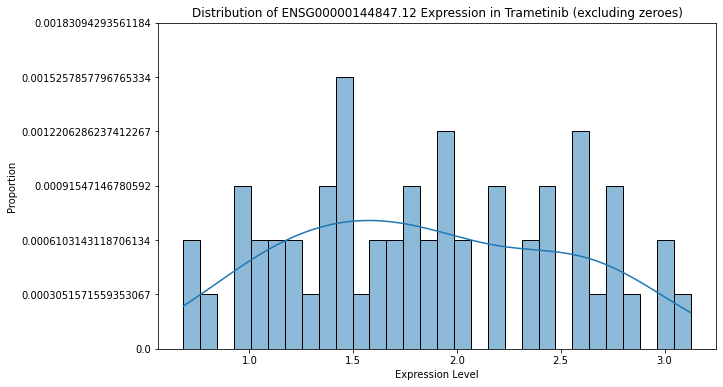

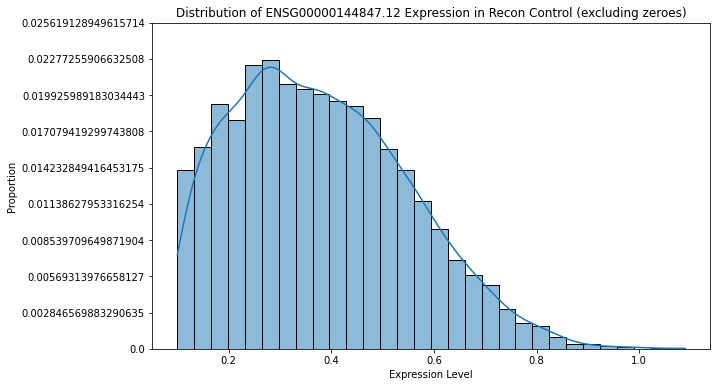

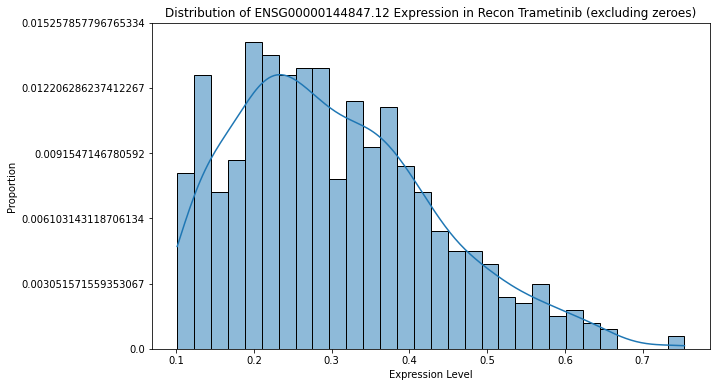

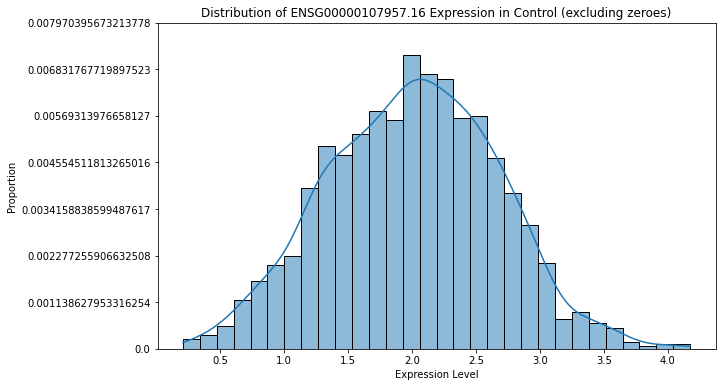

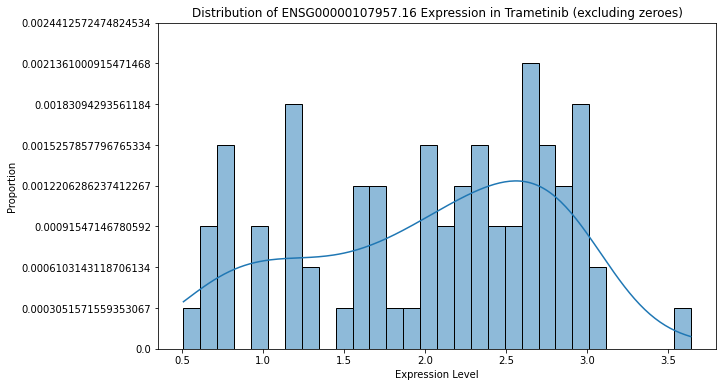

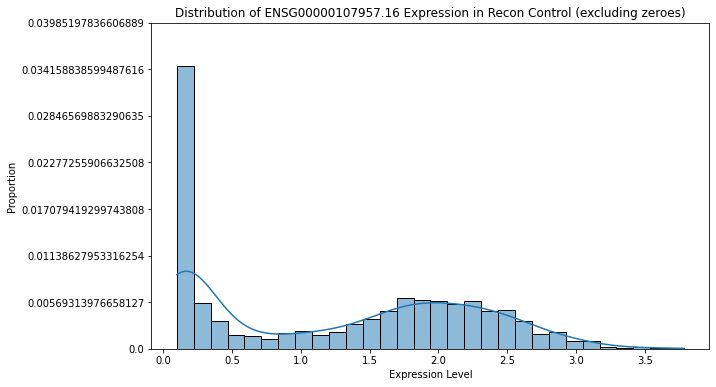

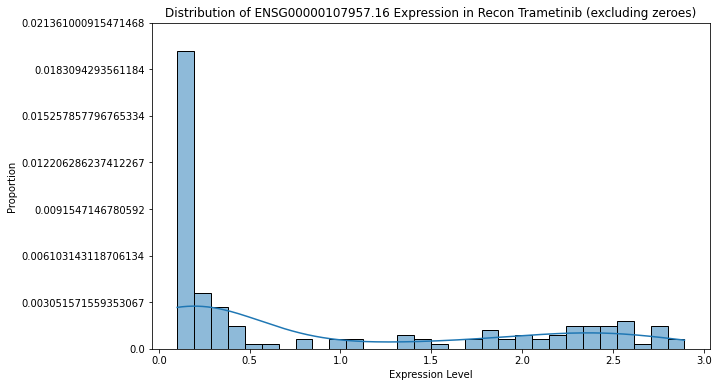

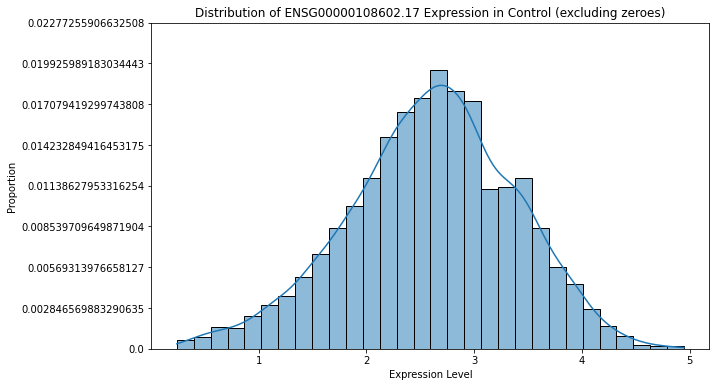

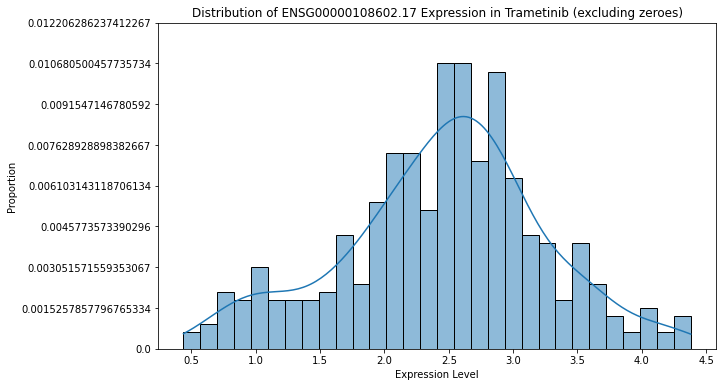

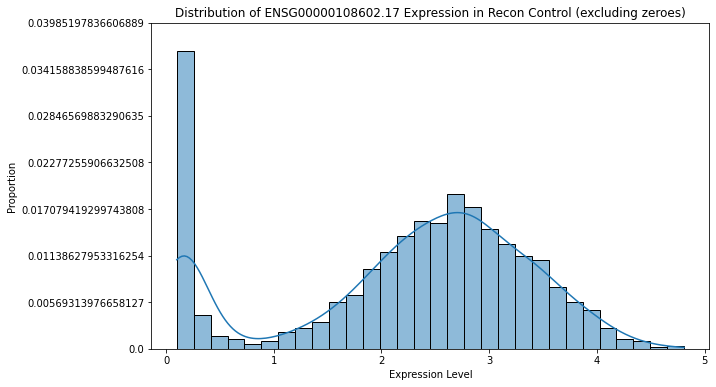

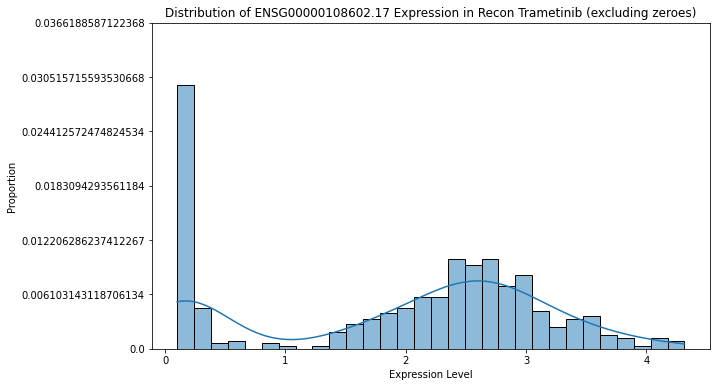

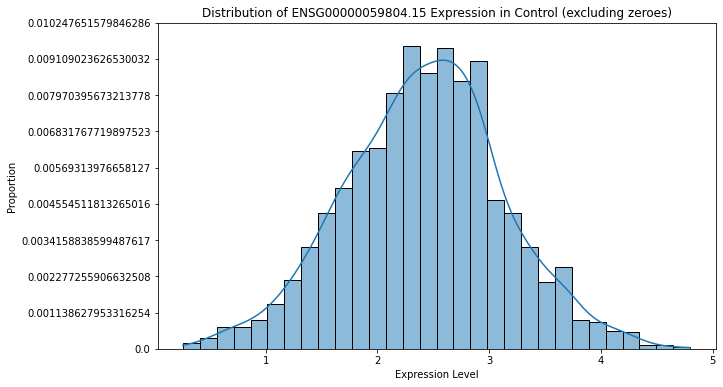

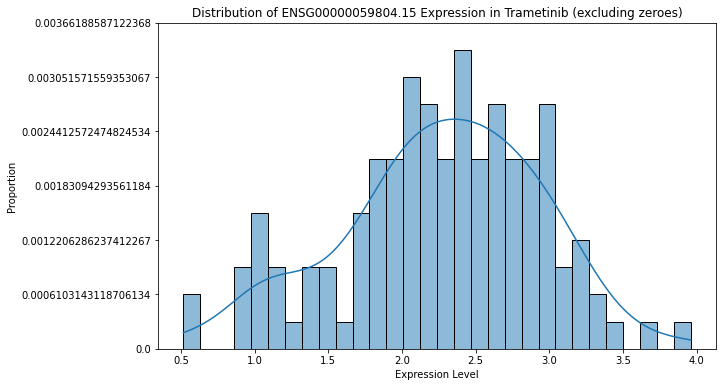

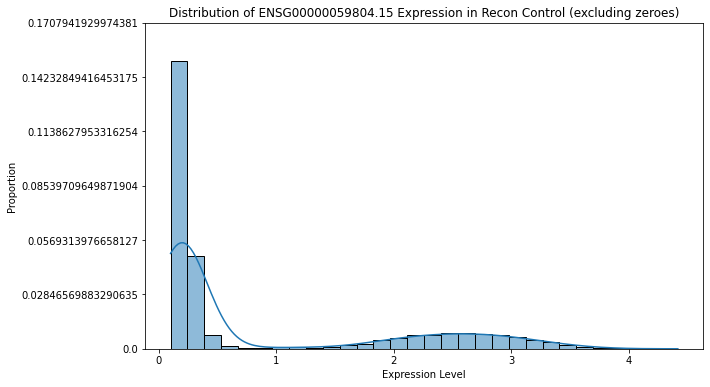

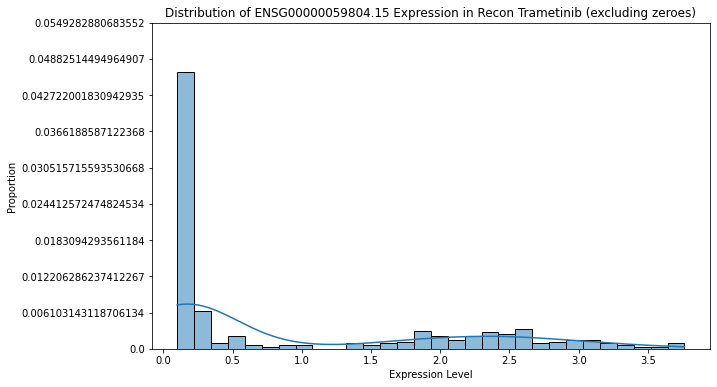

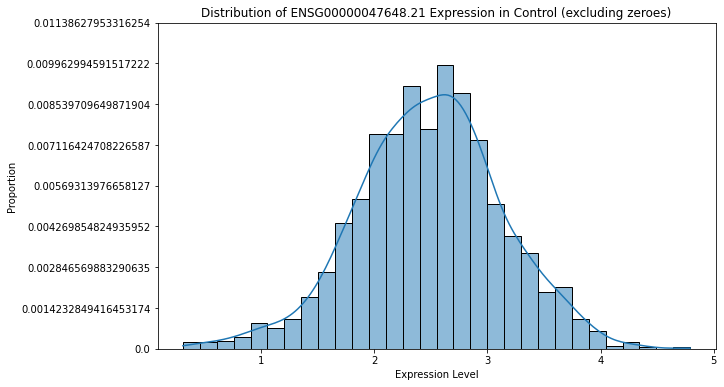

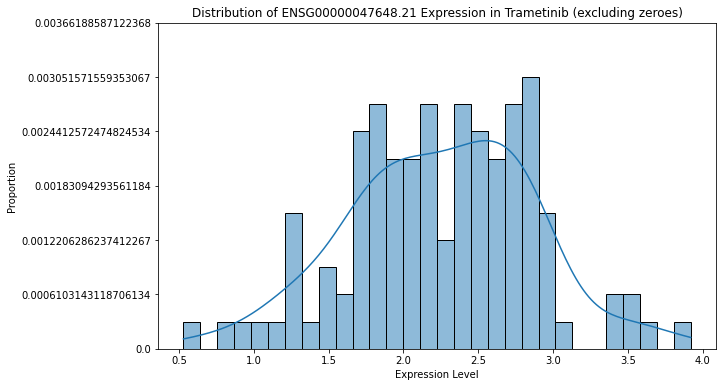

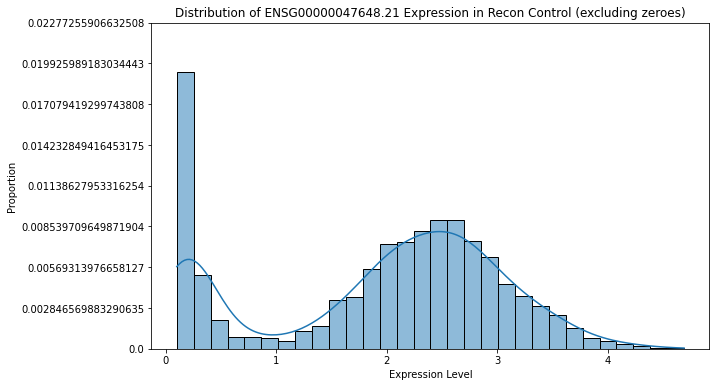

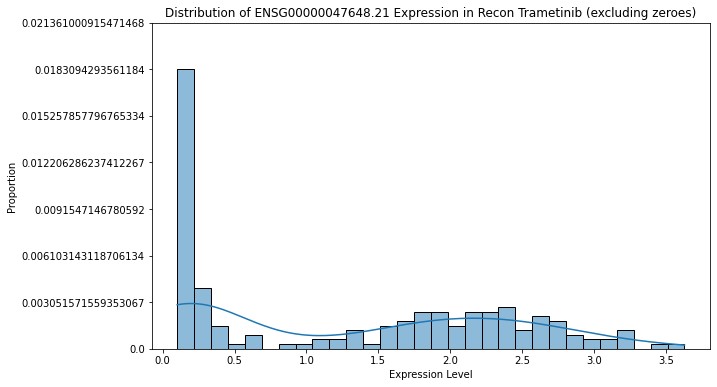

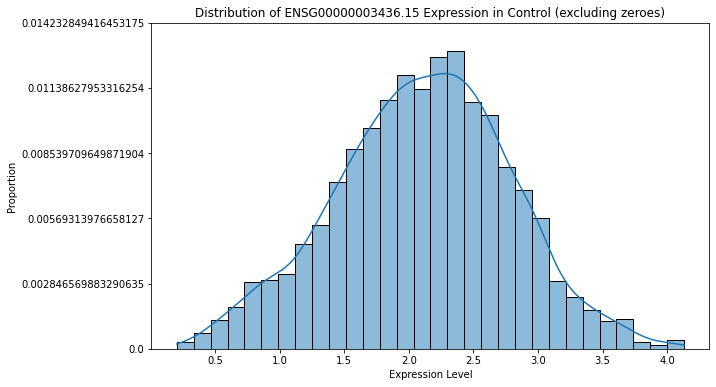

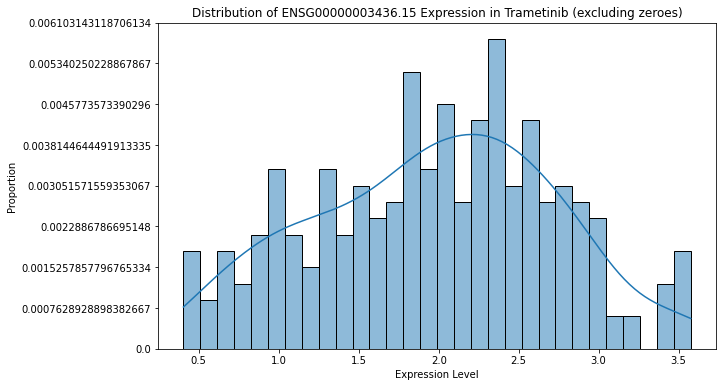

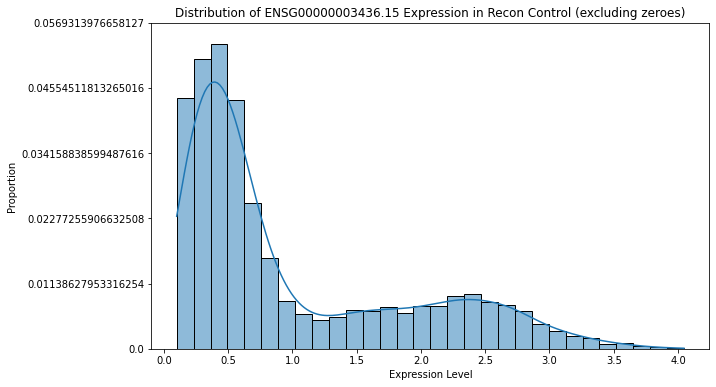

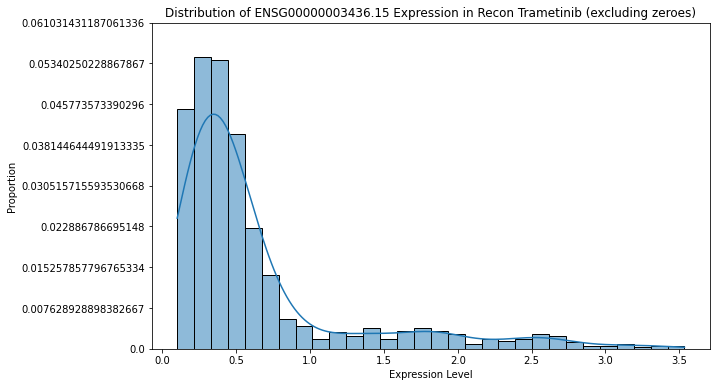

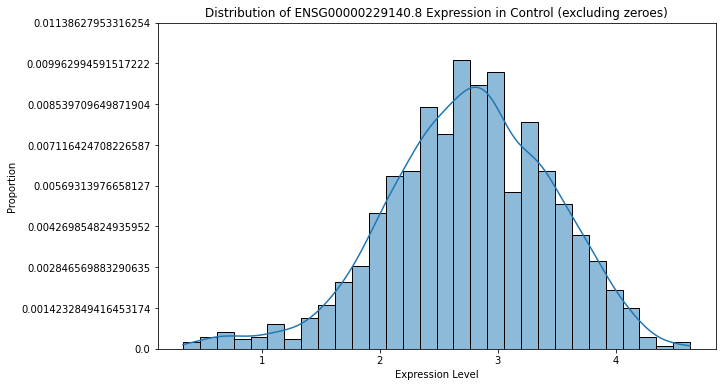

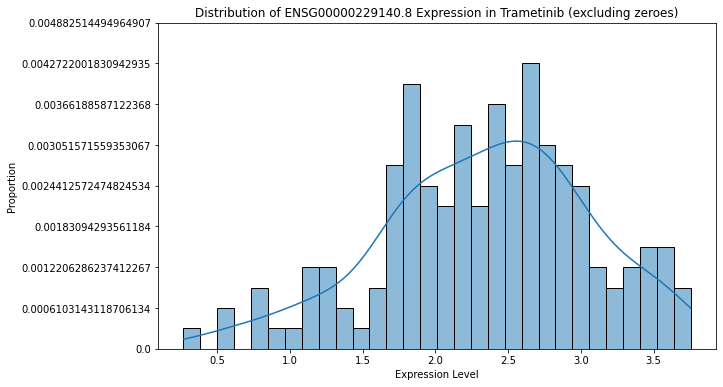

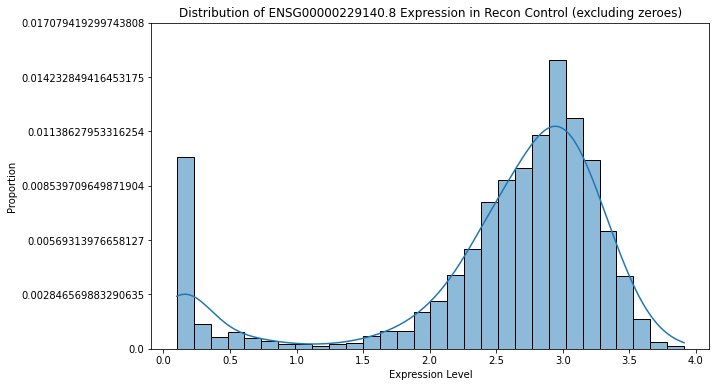

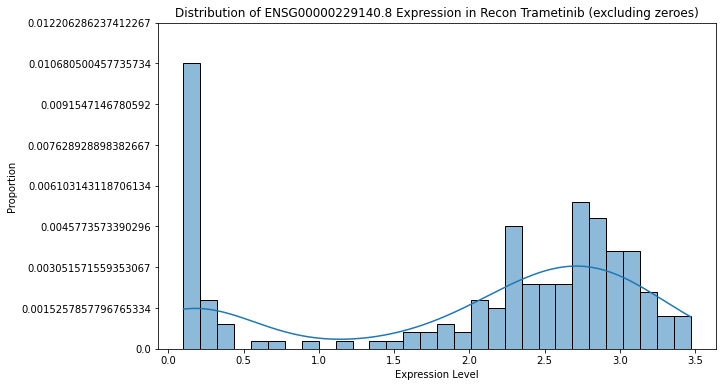

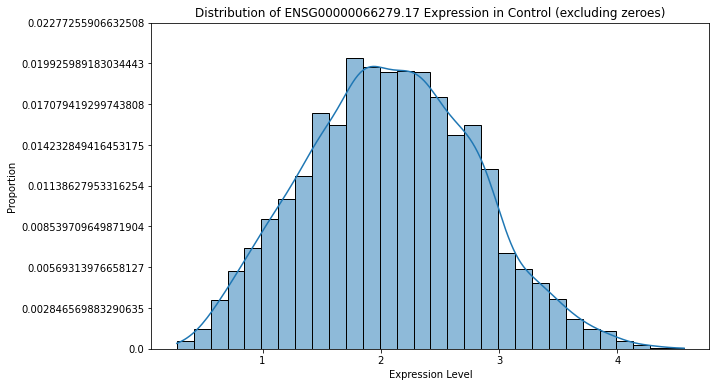

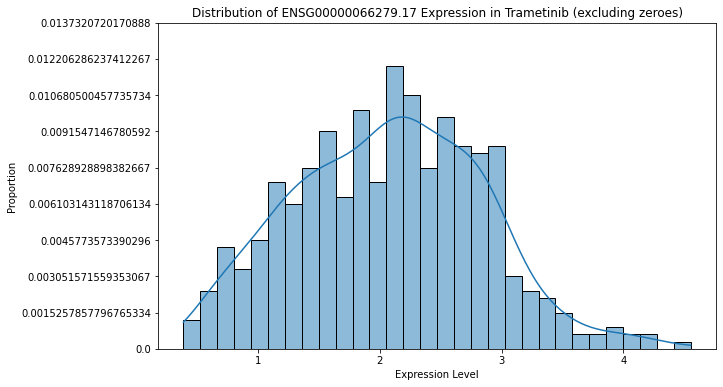

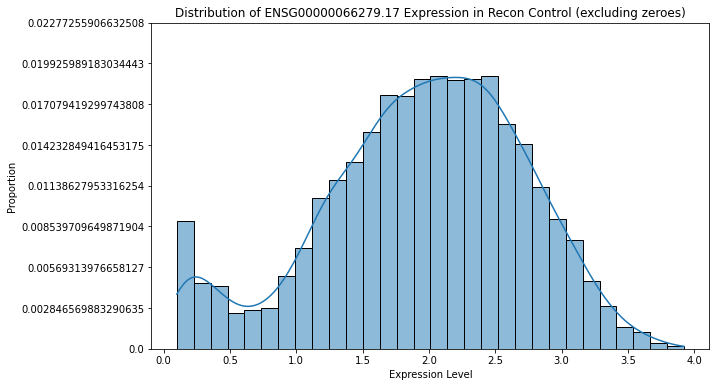

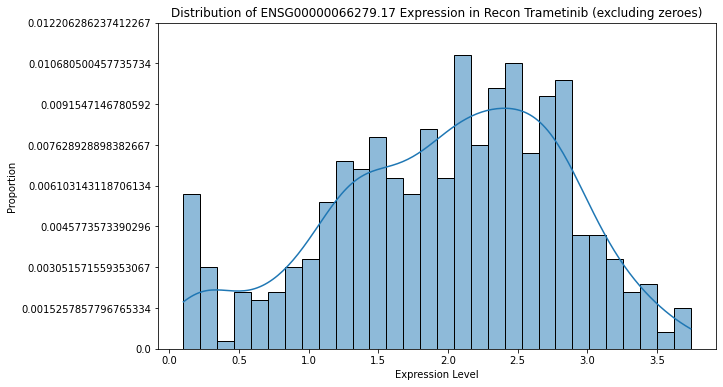

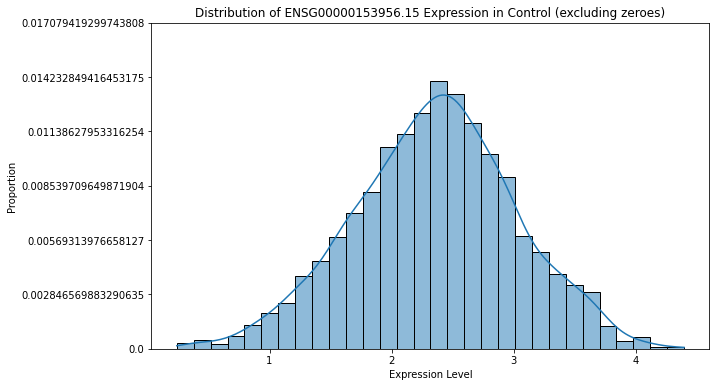

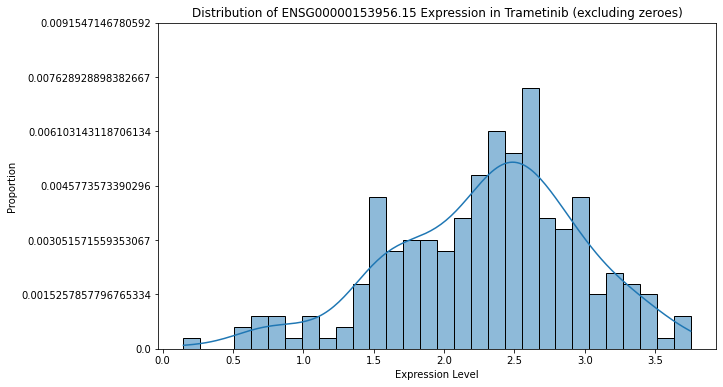

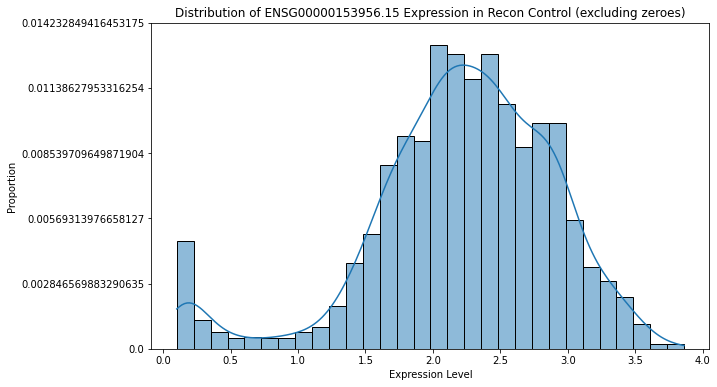

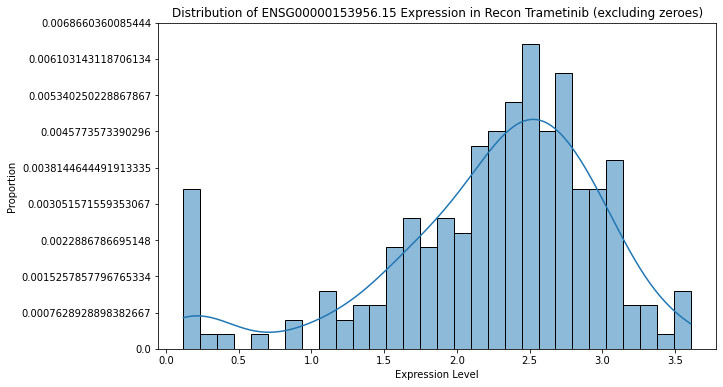

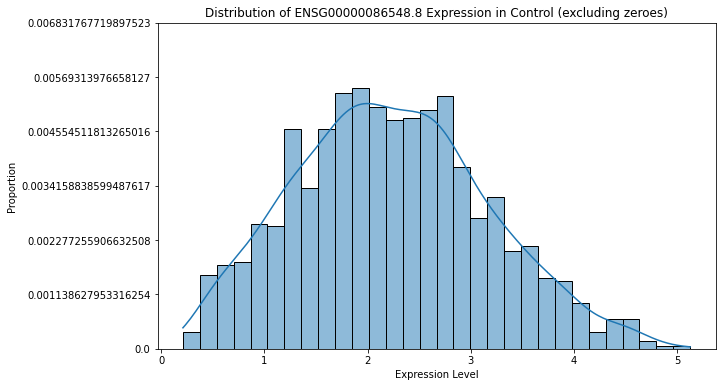

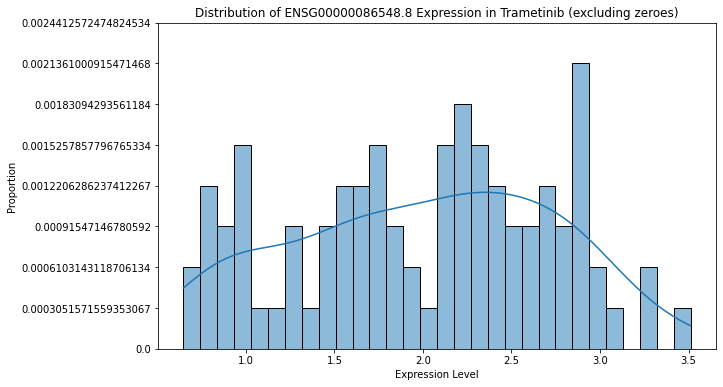

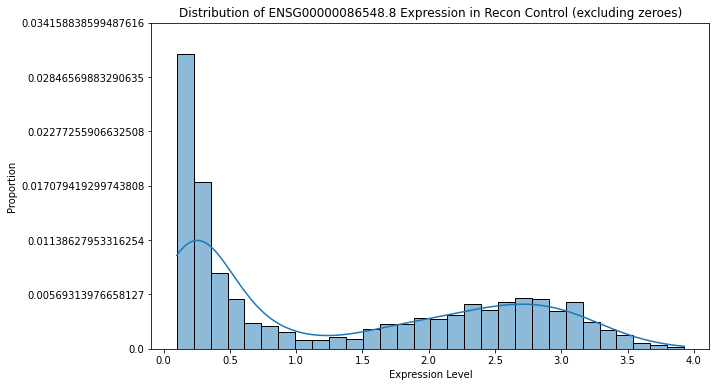

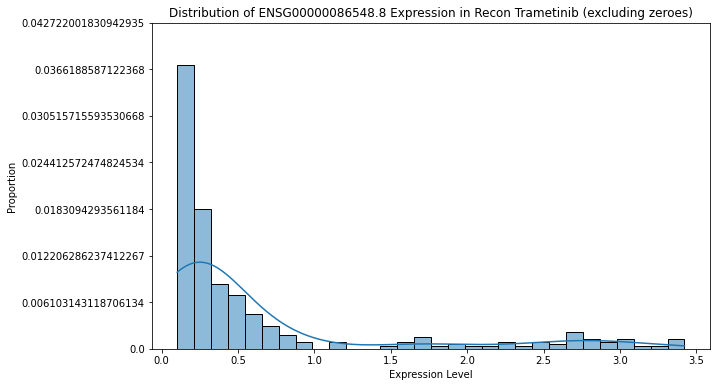

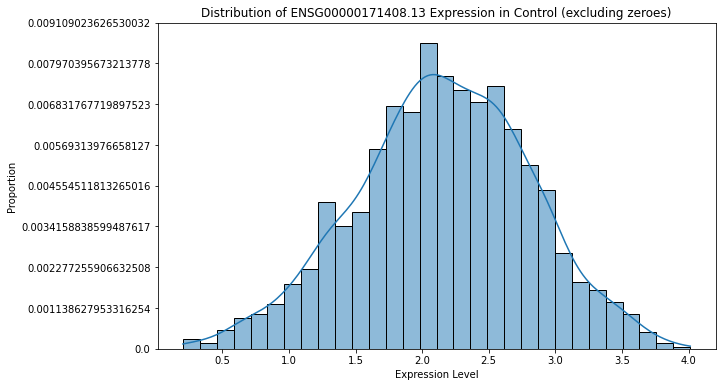

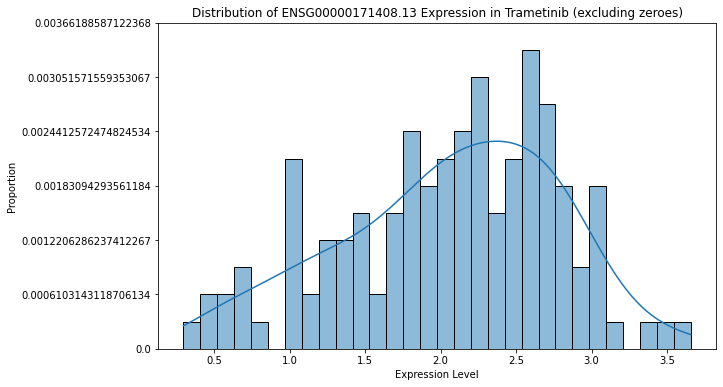

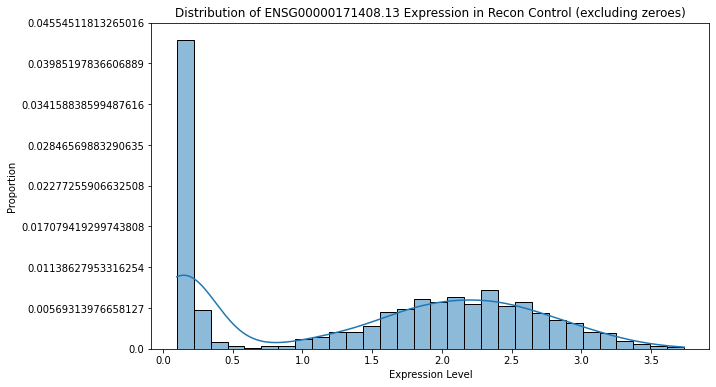

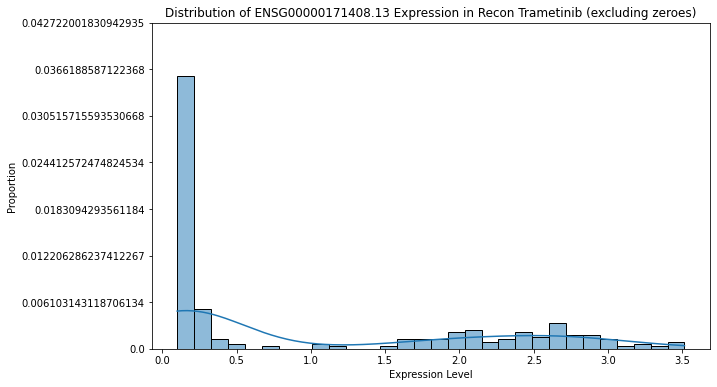

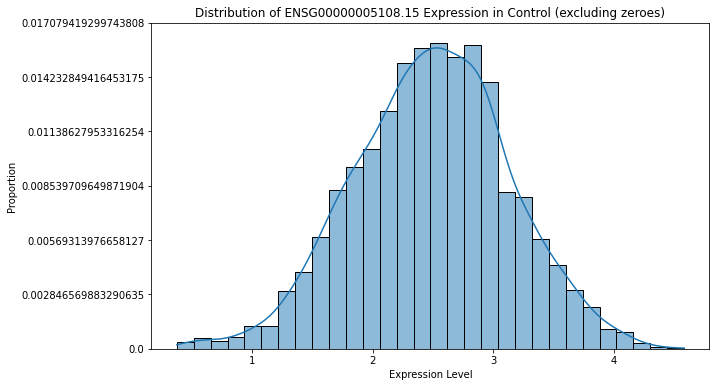

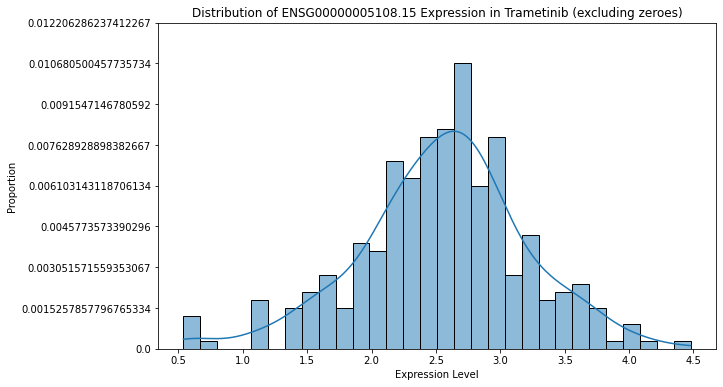

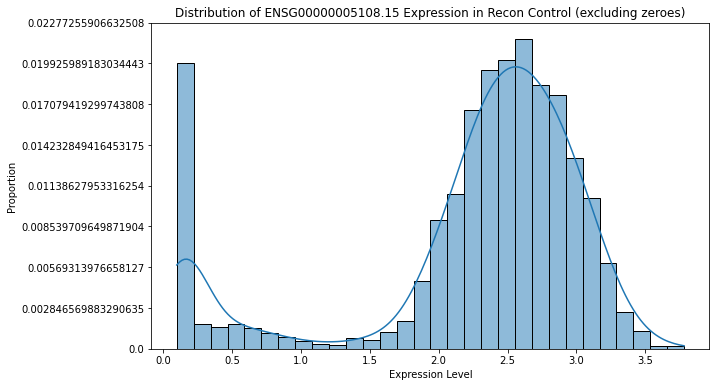

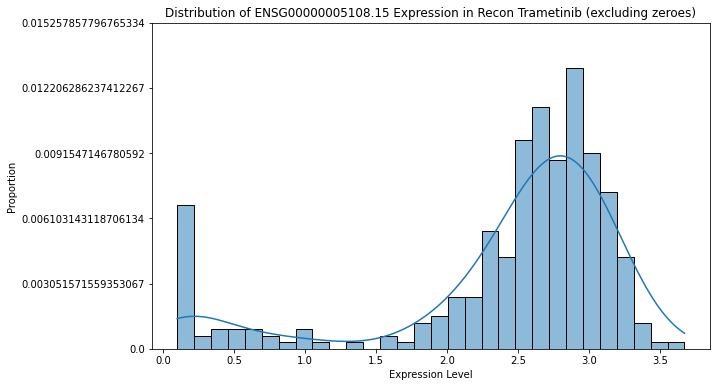

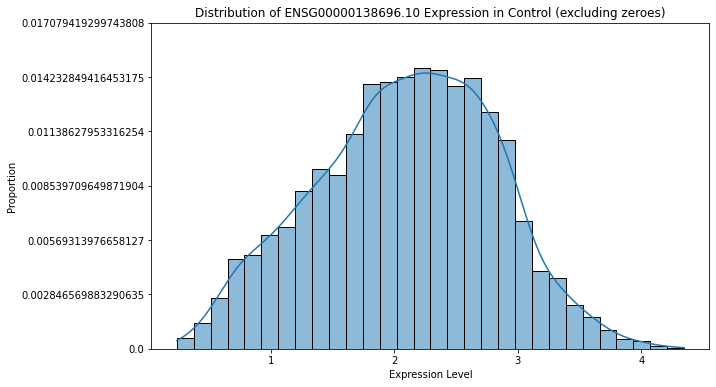

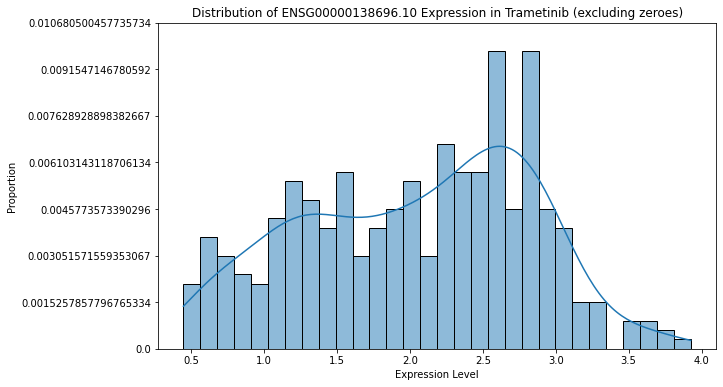

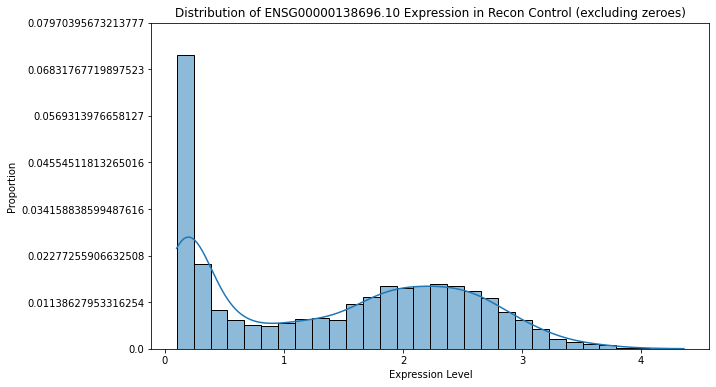

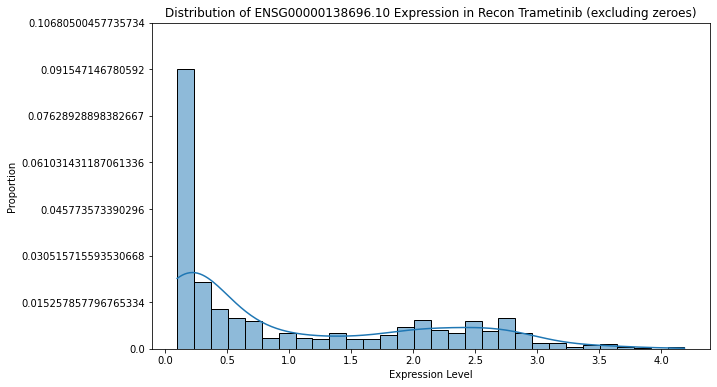

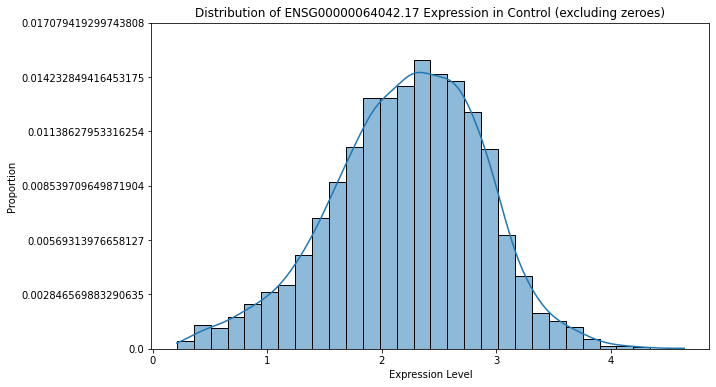

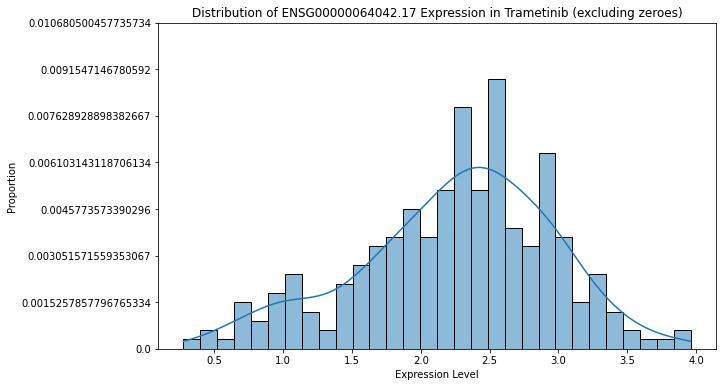

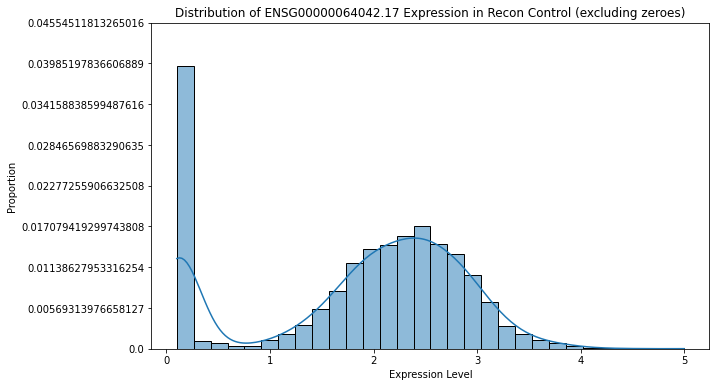

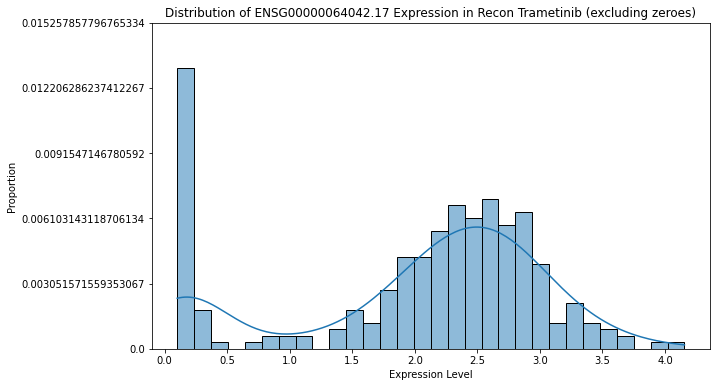

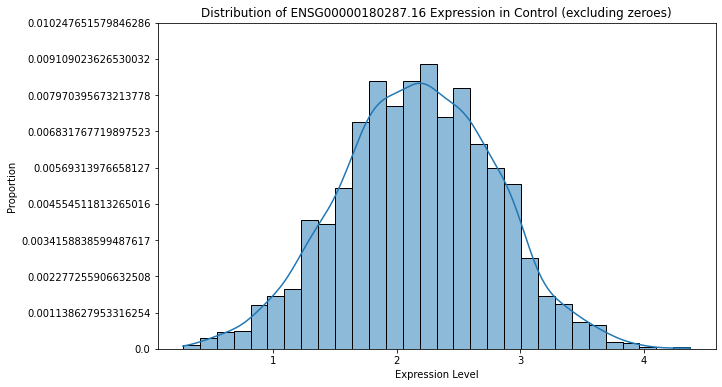

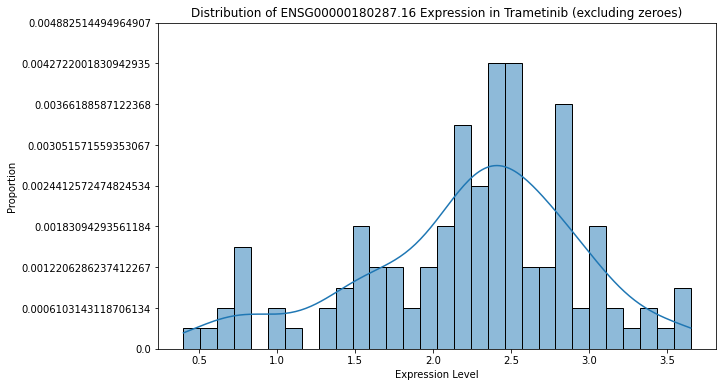

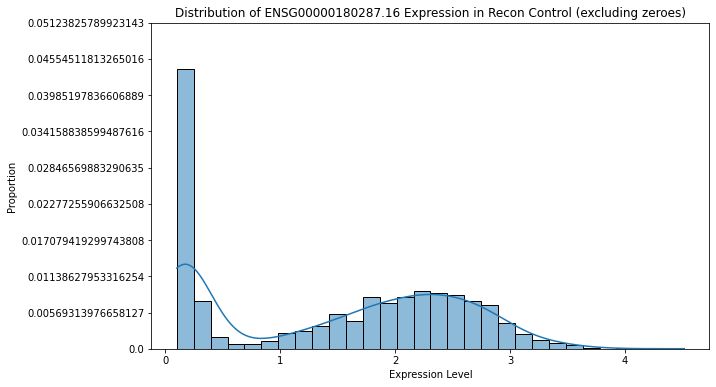

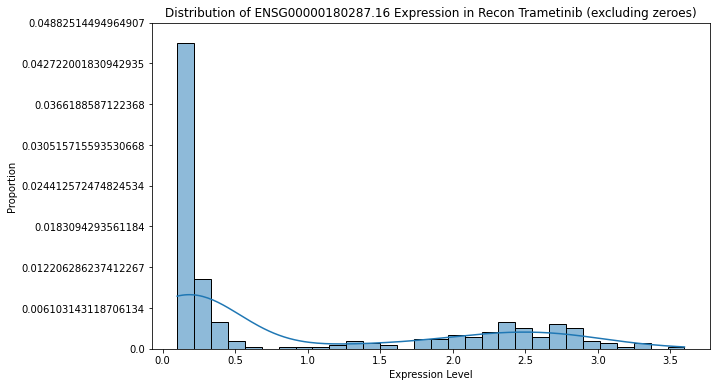

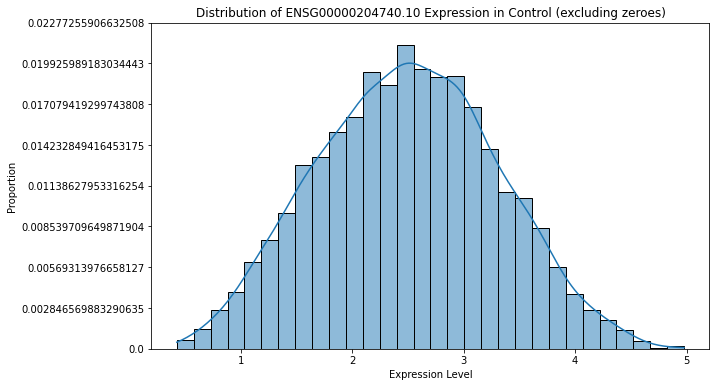

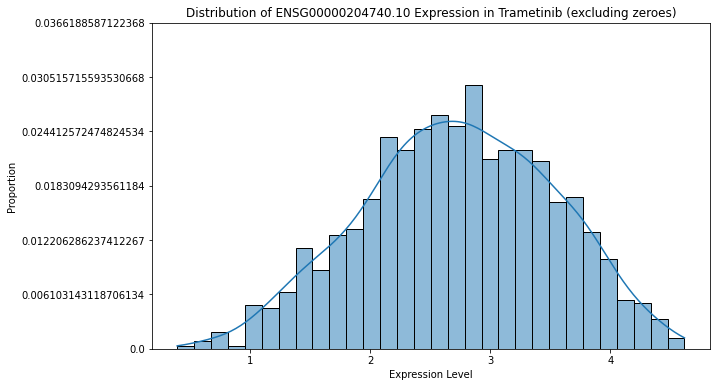

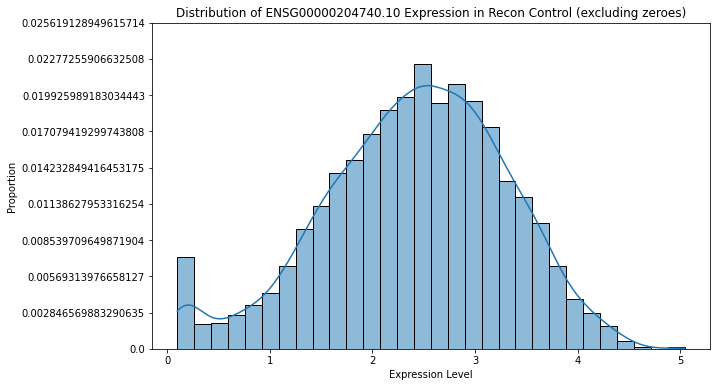

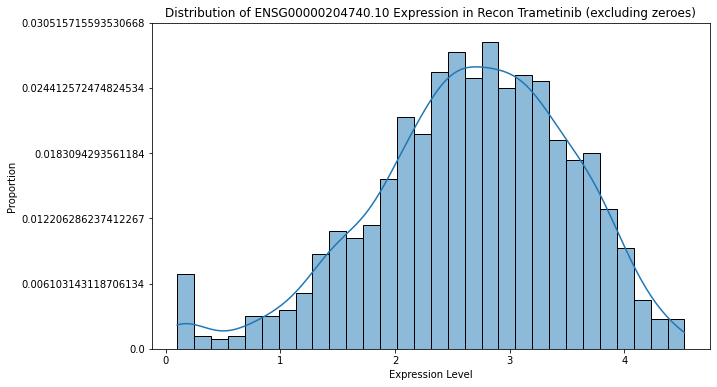

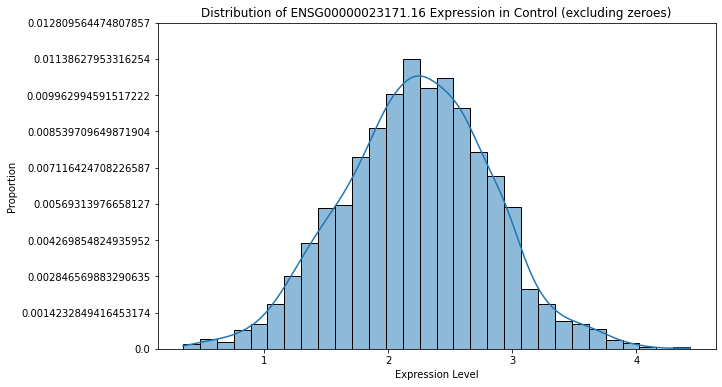

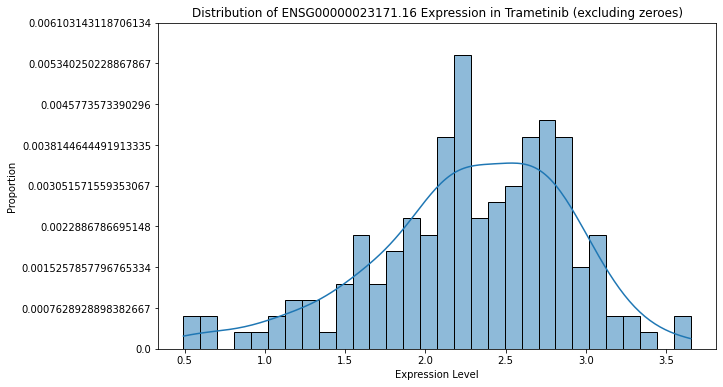

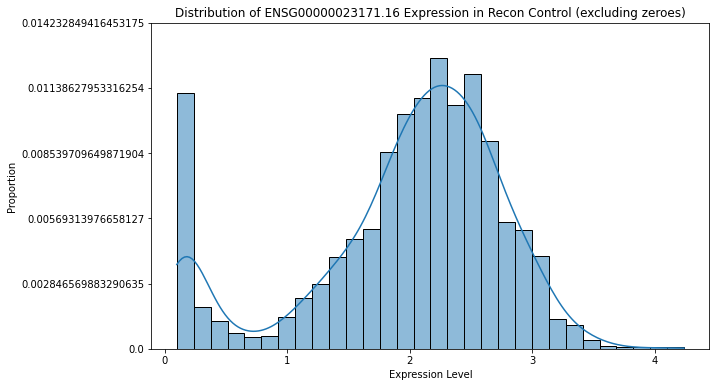

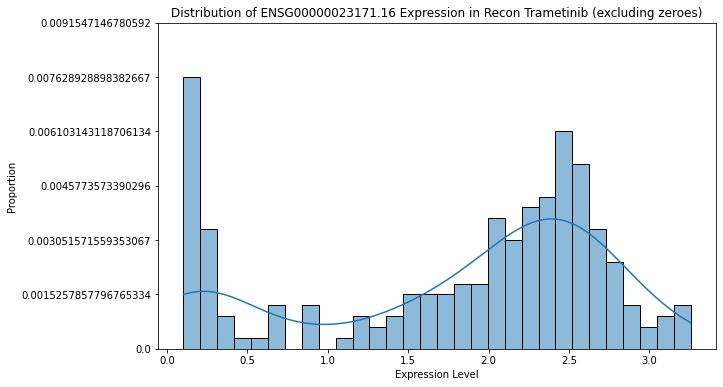

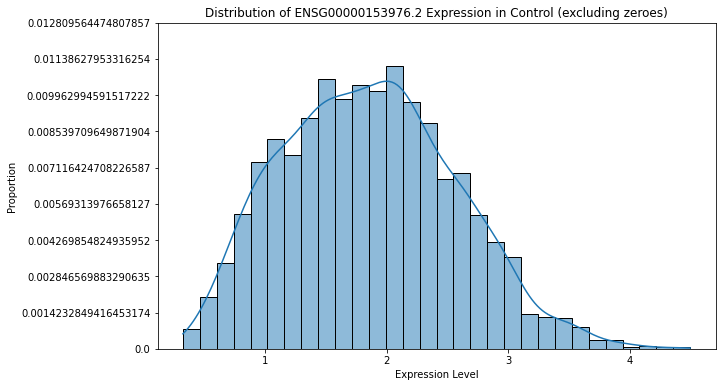

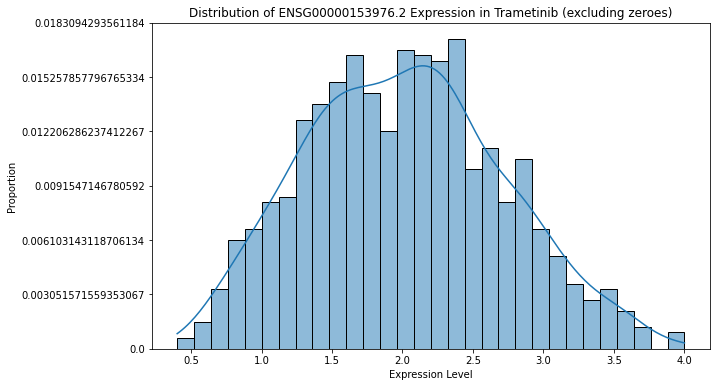

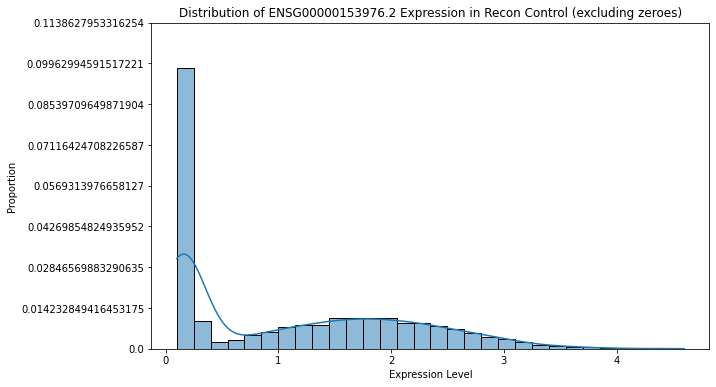

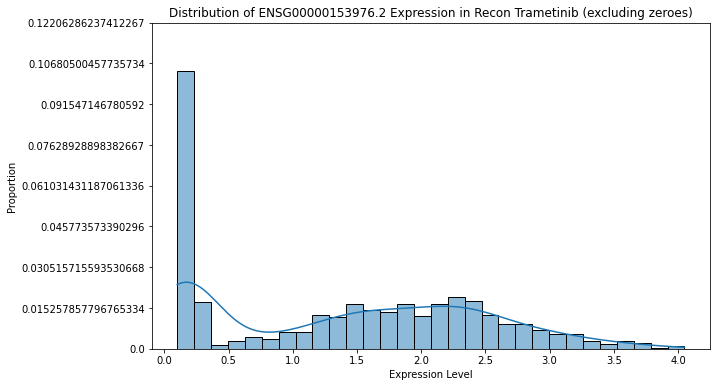

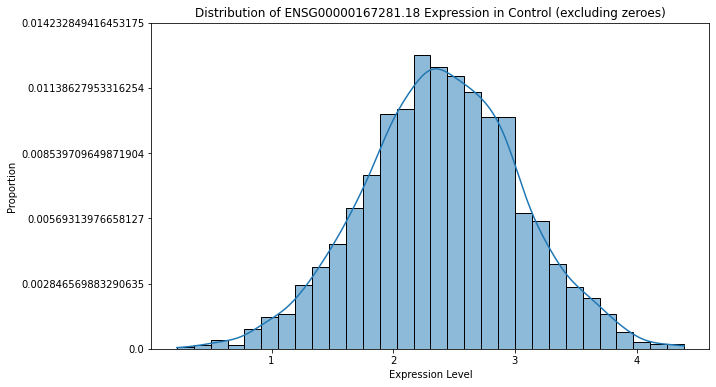

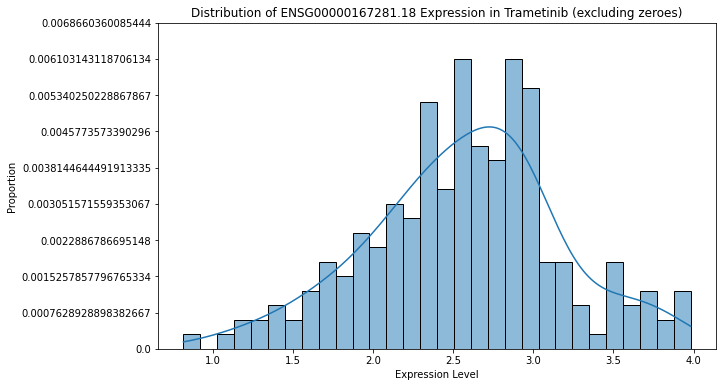

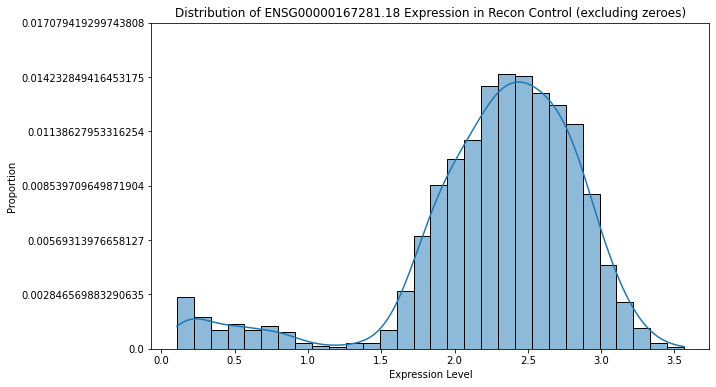

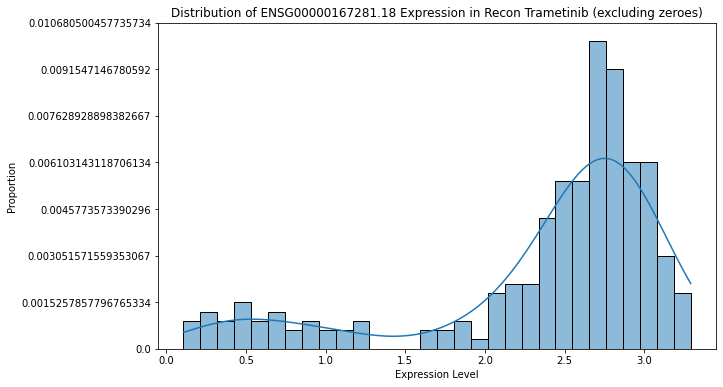

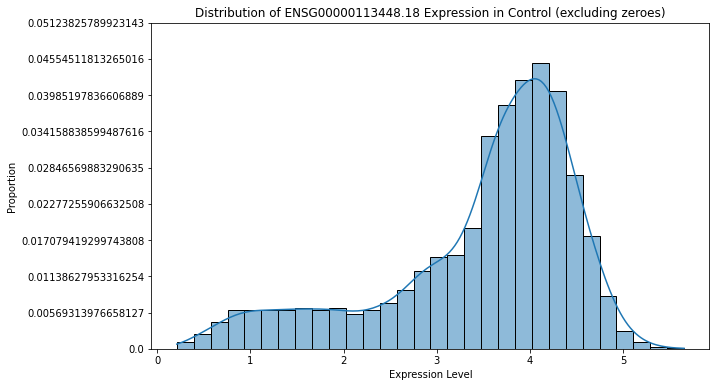

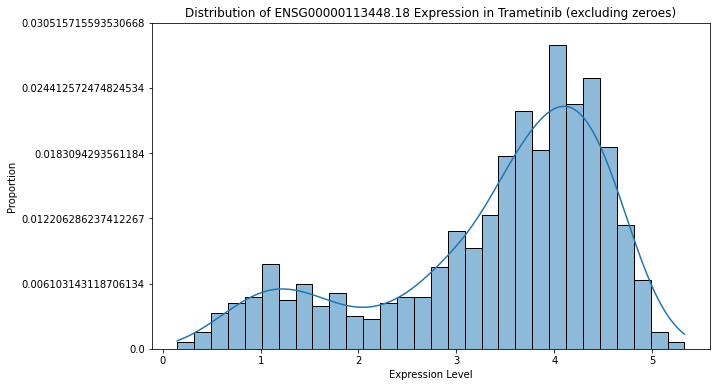

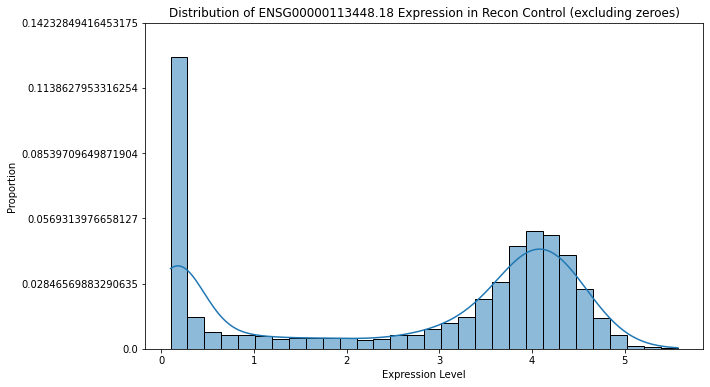

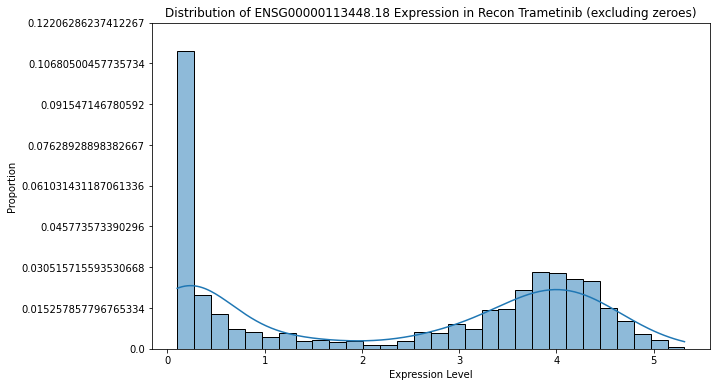

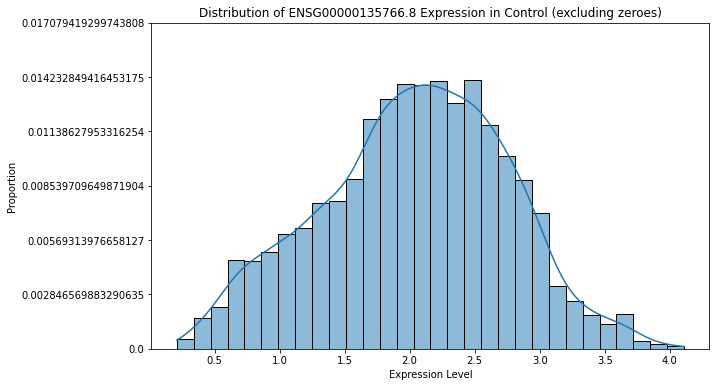

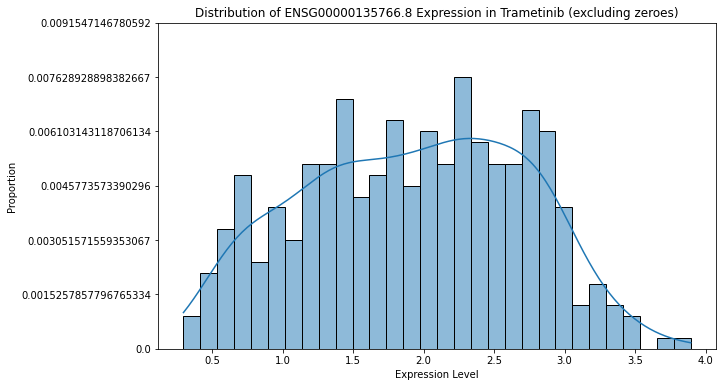

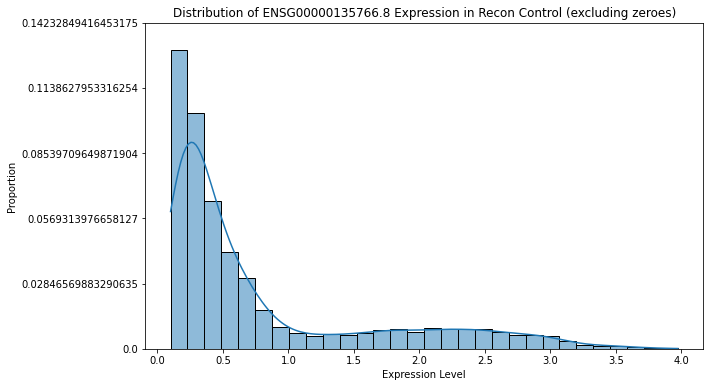

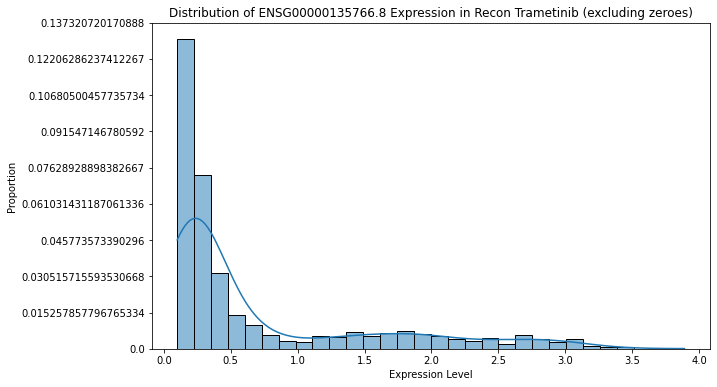

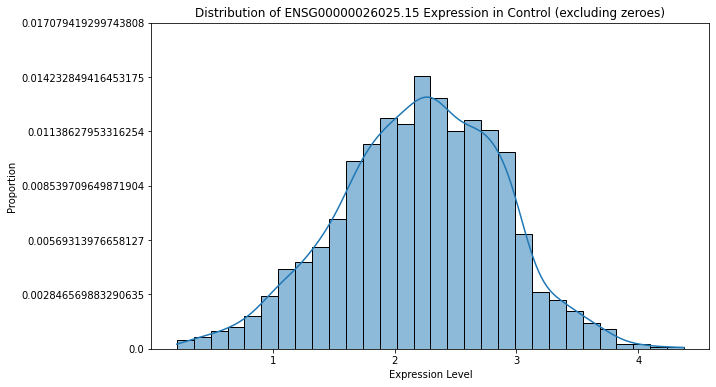

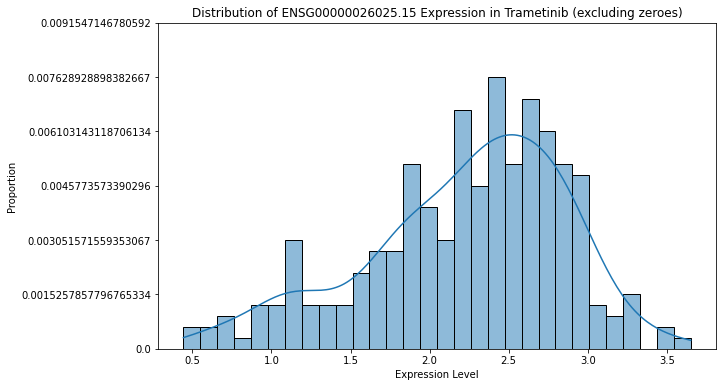

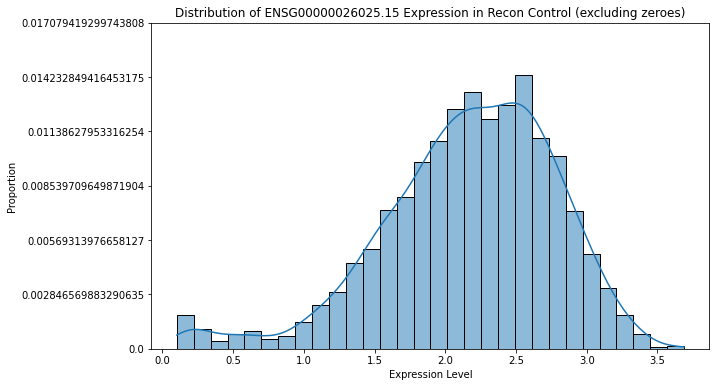

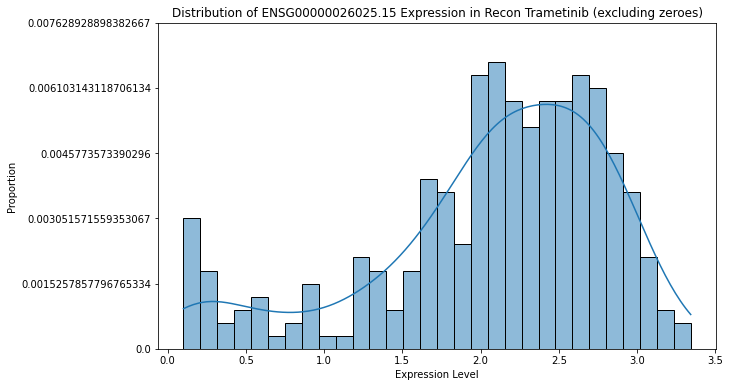

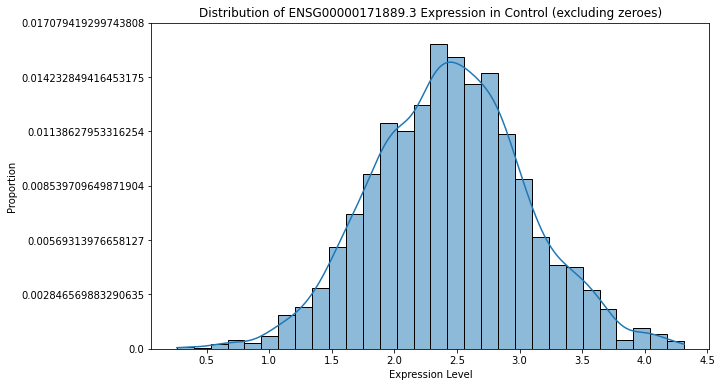

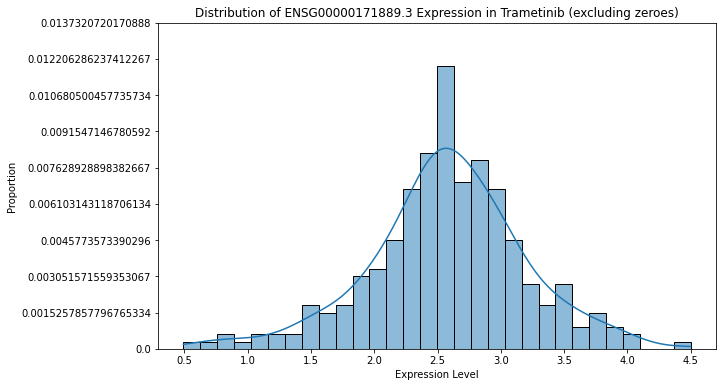

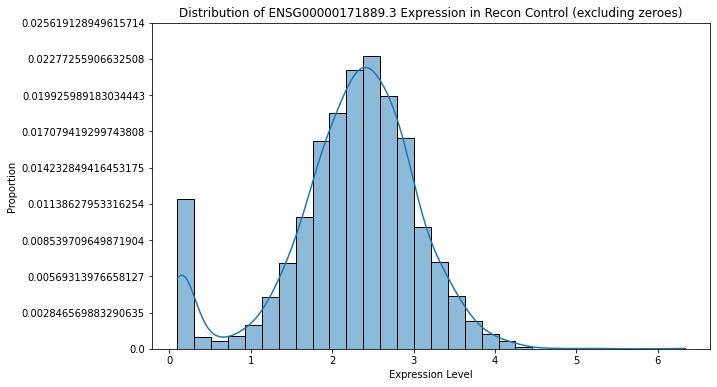

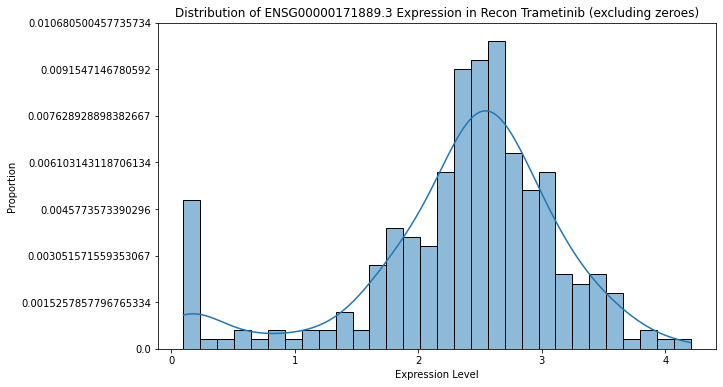

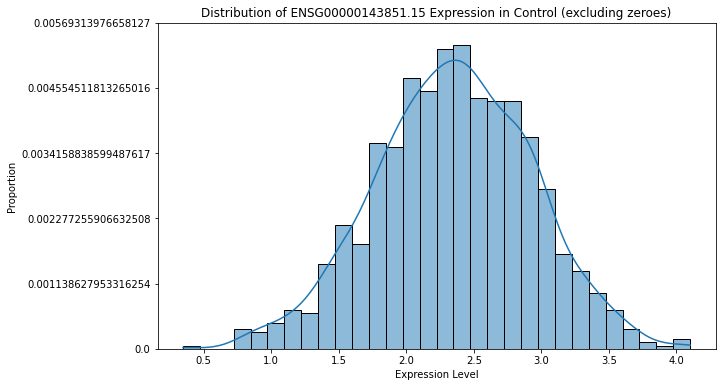

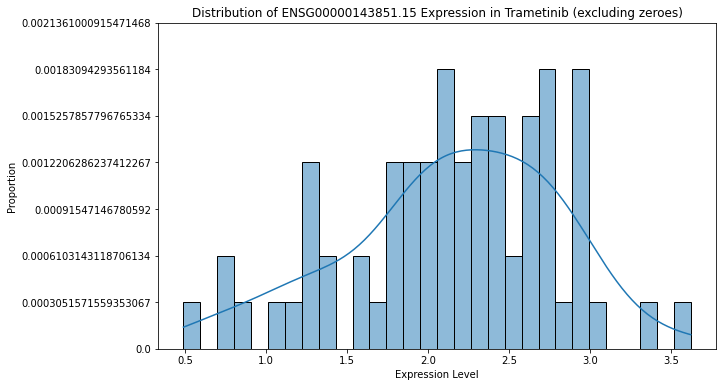

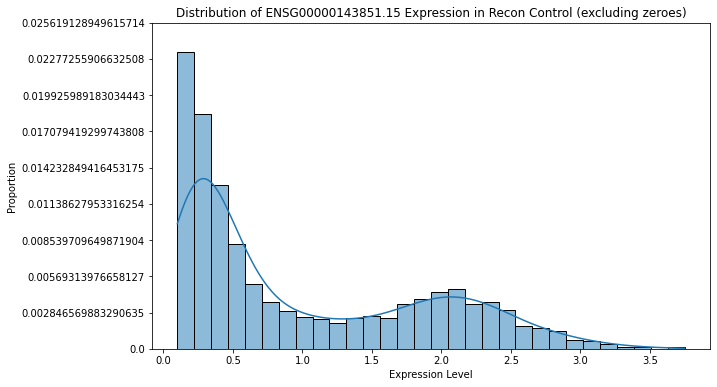

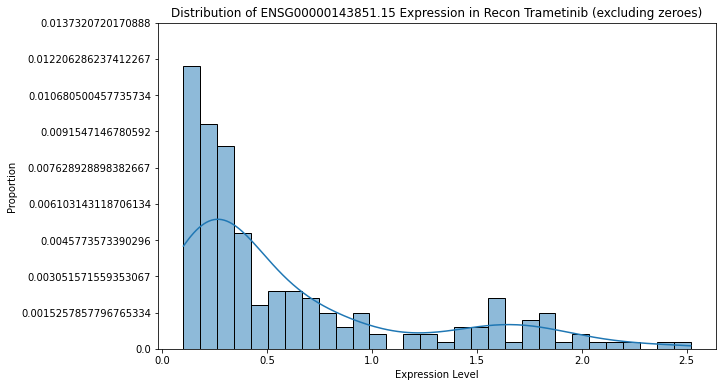

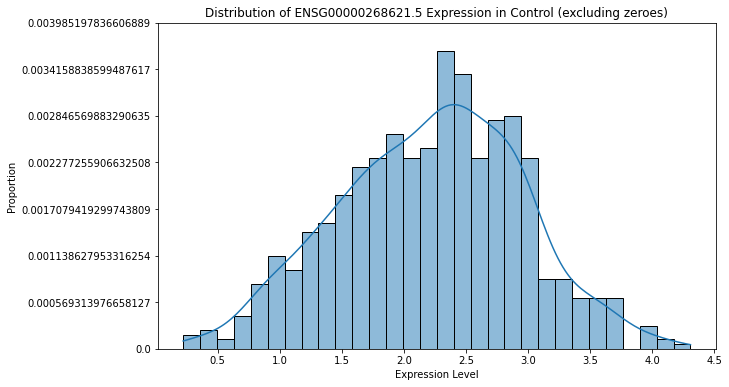

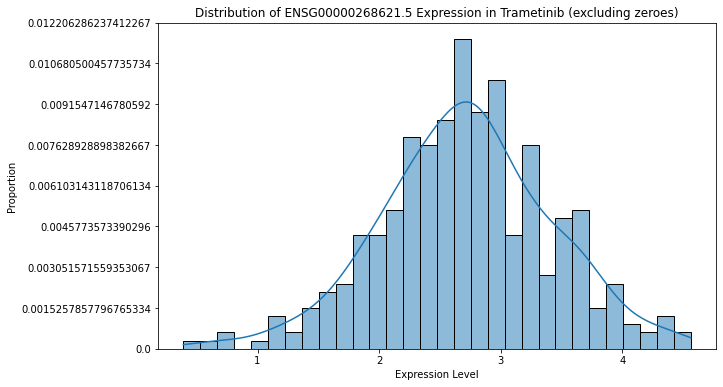

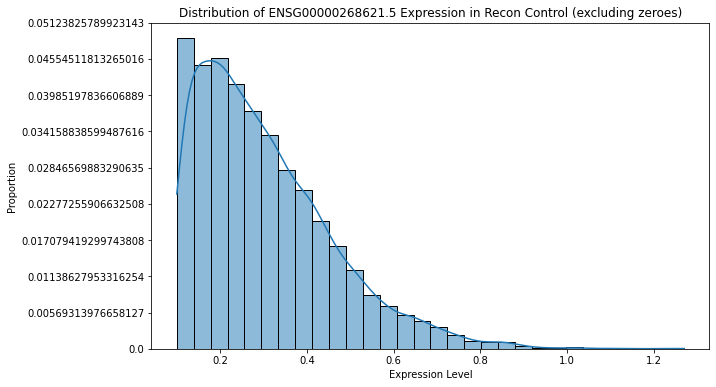

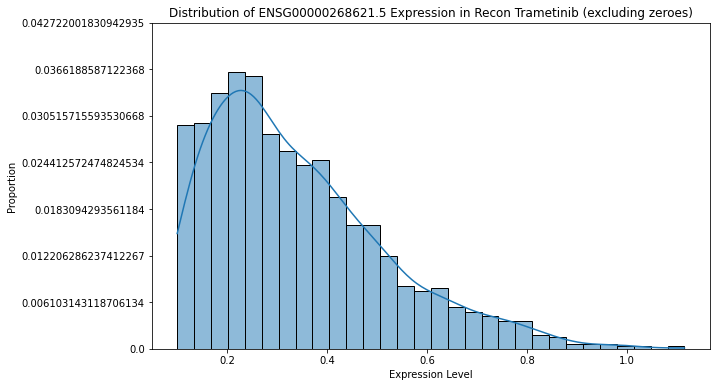

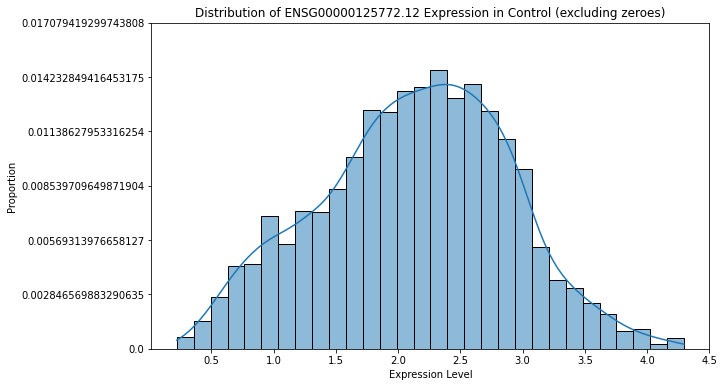

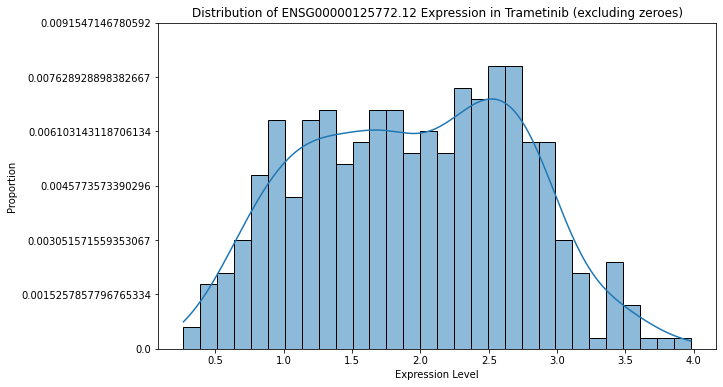

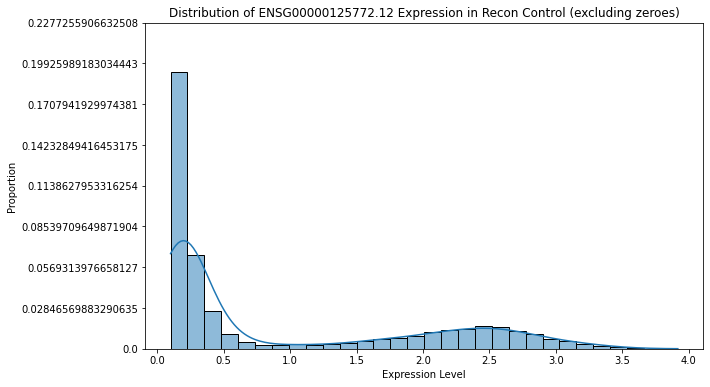

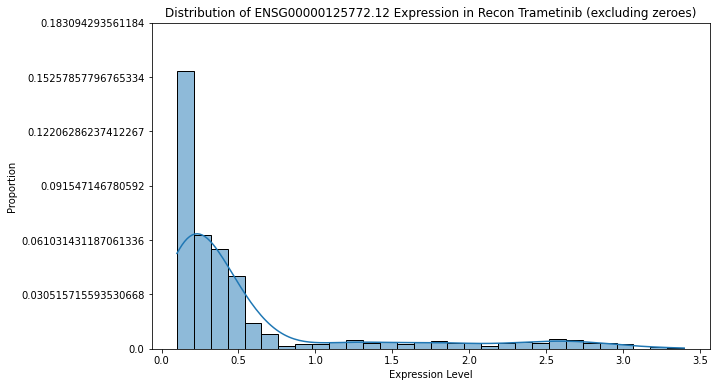

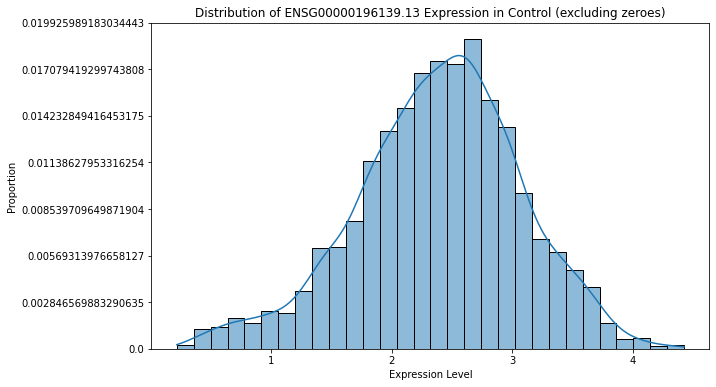

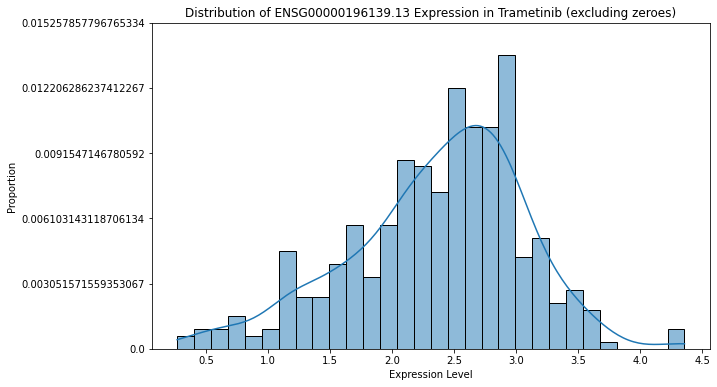

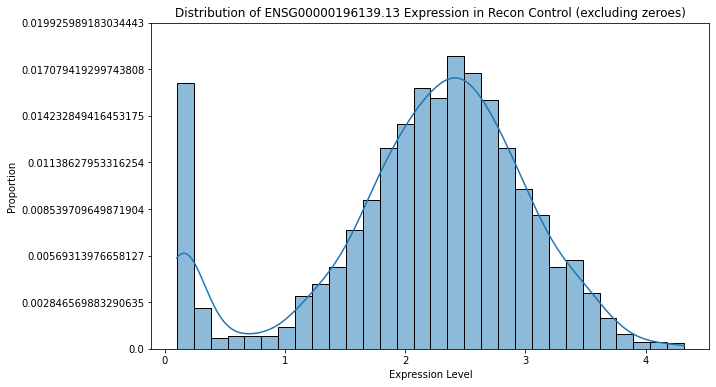

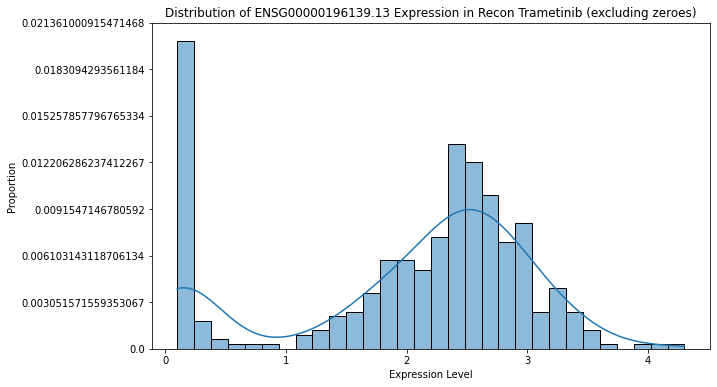

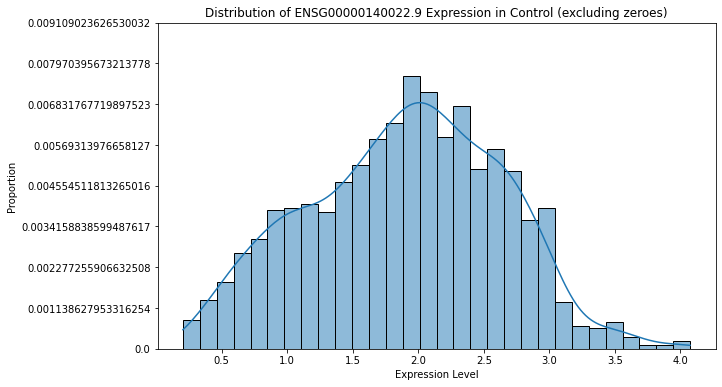

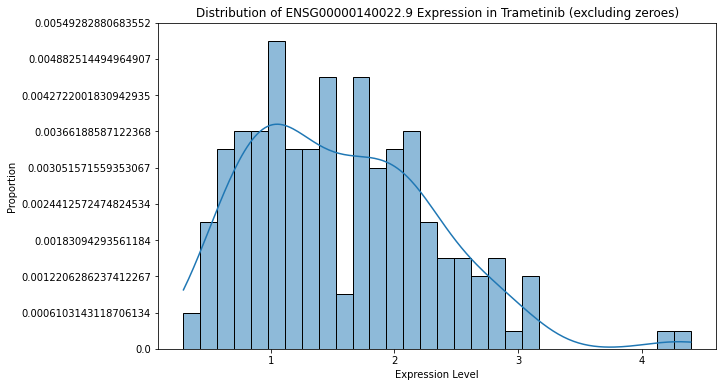

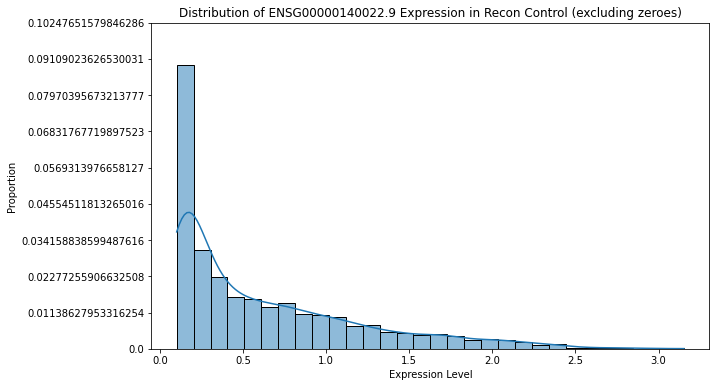

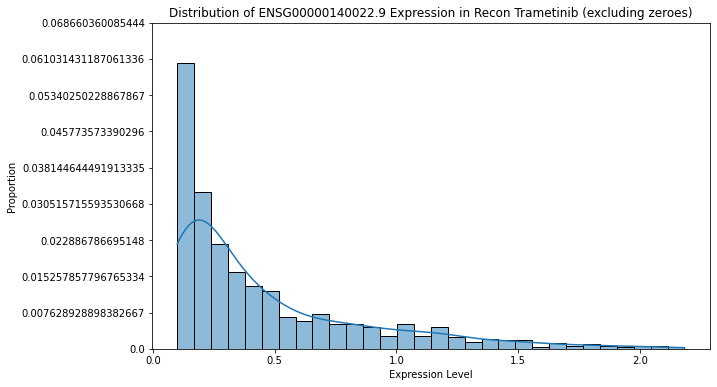

In [81]:
# Assuming gae_sel_mg is a pandas index object containing gene names

for gene in gae_sel_mg:
    plot_gene_expression(control, gene, 'Control')
    plot_gene_expression(trametinib, gene, 'Trametinib')
    plot_gene_expression(recon_control, gene, 'Recon Control', ae=True, cutoff=0.1)
    plot_gene_expression(recon_trametinib, gene, 'Recon Trametinib', ae=True, cutoff=0.1)


In [83]:
import umap

/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/rsg/chemistry/johnyang/miniconda3/envs/cot2/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/rsg/chemistry/johnyang/miniconda3/en

In [86]:
emb_control = emb_data[emb_data.obs.drug == 'control']
emb_trametinib = emb_data[emb_data.obs.drug == 'trametinib']

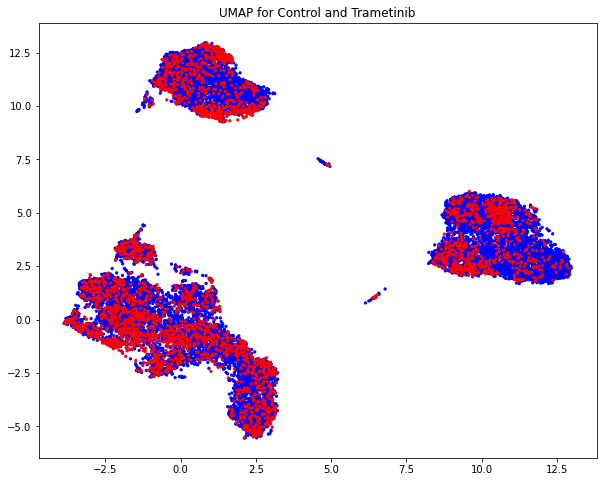

In [99]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the two datasets
combined_data = np.concatenate((emb_control.X, emb_trametinib.X))

# Create labels for the two datasets
labels = ['Control'] * len(emb_control.X) + ['Trametinib'] * len(emb_trametinib.X)

# Compute UMAP
for n_neighbors in [5]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(combined_data)

    # Create a color map
    colors = ['blue' if label == 'Control' else 'red' for label in labels]

    # Plot UMAP
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=5)
    plt.title('UMAP for Control and Trametinib')
    plt.show()


In [100]:
import umap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Compute UMAP
for n_neighbors in [5]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    embedding = reducer.fit_transform(emb_data.X)

    # Get unique drugs and corresponding colors
    unique_drugs = emb_data.obs.drug.unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_drugs)))

    # Create a color map
    colormap = dict(zip(unique_drugs, colors))
    point_colors = [colormap[drug] for drug in emb_data.obs.drug]

    # Plot UMAP
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=point_colors, s=5)

    # Create a custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap[drug], markersize=10) for drug in unique_drugs]
    plt.legend(handles, unique_drugs)

    plt.title('UMAP for Emb_Data')
    plt.show()


In [96]:
emb_data.X.shape

(762039, 50)

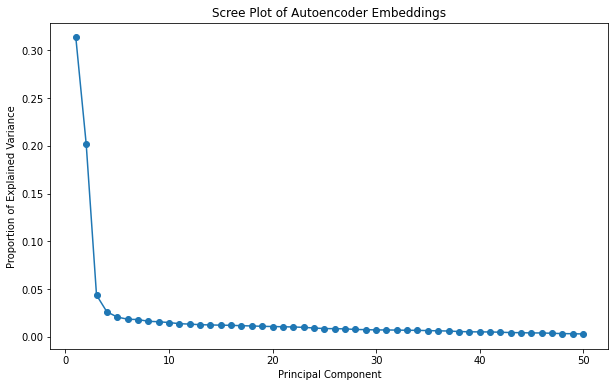

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
pca = PCA()
pca.fit(emb_data.X)

# Get explained variance ratios (eigenvalues)
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, 'o-')
plt.title('Scree Plot of Autoencoder Embeddings')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()
